## Import Necessary Libraries & Dependencies

In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
import shap
shap.initjs()

import pickle

import warnings
warnings.filterwarnings("ignore")

## Data Loading, Exploration, &

Preprocessing

### Load Data

In [ ]:
#read csv into a pandas dataframe
#vehicle_df = pd.read_csv("../dataset/vehicle_data.csv")
url = "https://raw.githubusercontent.com/toobask/introtoAI1/main/dataset/vehicle_data.csv"
vehicle_df = pd.read_csv(url)
vehicle_df[:5]

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


In [ ]:
#check shape of df
vehicle_df.shape
print(f"This dataframe contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

This dataframe contains 123971 rows and 19 columns.


### EDA

Here, we explore individual features.

In [ ]:
#display column names
vehicle_df.columns

Index(['Title', 'Sub_title', 'Price', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date'],
      dtype='object')

#### Title & Sub-title

In [ ]:
#view content of title and sub title columns
vehicle_df[["Title", "Sub_title"]]

,Title,Sub_title
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur..."
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku..."
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo"
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo"
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha"
...,...,...
123966,Honda Insight Ze3 2012,"Posted by Duminda on 2021-11-04 11:41 pm, Ja-Ela"
123967,HINO Dutro 2011 Lorry,"Posted by Areej on 2021-11-04 11:39 pm, Colombo"
123968,TVS King 2017 Three,"Posted by Safan on 2021-11-04 11:38 pm, Colombo"
123969,Toyota Vitz 2018,Posted by Sampath Kodithuwakku on 2021-11-04 1...


#### Brand

In [ ]:
#view brand column
vehicle_df.Brand

,Brand
0,Honda
1,Jaguar
2,Toyota
3,Toyota
4,Toyota
...,...
123966,Honda
123967,HINO
123968,TVS
123969,Toyota


In [ ]:
#view unique brands
vehicle_df.Brand.unique()

array(['Honda', 'Jaguar', 'Toyota', 'Mitsubishi', 'Suzuki', 'MG',
       'Peugeot', 'BMW', 'Mercedes Benz', 'Mazda', 'Land Rover',
       'Hyundai', 'Micro', 'Audi', 'Daihatsu', 'Nissan', 'Lexus', 'Kia',
       'Tata', 'Perodua', 'Ford', 'Chery', 'Renault', 'Aston Martin',
       'Chevrolet', 'Other brand', 'Subaru', 'Alfa Romeo', 'Zotye',
       'DFSK', 'Mahindra', 'Skoda', 'Volkswagen', 'Maruti Suzuki', 'Jeep',
       'Ssang Yong', 'Hummer', 'Datsun', 'Tesla', 'Mini', 'Isuzu', 'Fiat',
       'Porsche', 'Morris', 'Austin', 'Opel', 'Daewoo', 'Proton', 'Volvo',
       'Rover', 'Chrysler', 'Maruti', 'Geely', 'Citroen', 'Smart',
       'Moto Guzzi', 'Vauxhall', 'Pontiac', 'SEAT', 'Changan', 'Buick',
       'TVS', 'Hero', 'Mercedes-Benz', 'Bajaj', 'Piaggio', 'Yamaha',
       'Other', 'JAC', 'FAW', 'Ashok-Leyland', 'Komatsu', 'Kubota',
       'Eicher', 'Massey-Ferguson', 'Ranomoto', 'Force', 'Demak',
       'Hero-Honda', 'Sonalika', 'Foton', 'Kinetic', 'Yanmar', 'Kobelco',
       'Loncin', 

In [ ]:
#how many brands are there?
print(f"There are {vehicle_df.Brand.nunique()} unique vehicle brands.")

There are 123 unique vehicle brands.


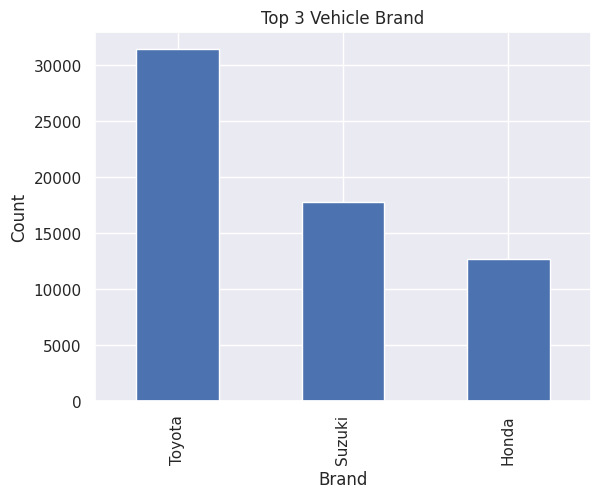

In [ ]:
#what are the top 3 brands
top3_brands = vehicle_df.Brand.value_counts().head(3)

#plot top3 brands
top3_brands.plot(kind="bar")
plt.title("Top 3 Vehicle Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Model

In [ ]:
#view model column
vehicle_df.Model

,Model
0,Vezel
1,XF
2,CHR
3,CHR
4,Land Cruiser Prado
...,...
123966,Insight Ze3
123967,Dutro
123968,King
123969,Vitz


In [ ]:
#how many vehicle models are present in the dataset
print(f"There are {vehicle_df.Model.nunique()} unique vehicle models.")

There are 8506 unique vehicle models.


Text(0, 0.5, 'Count')

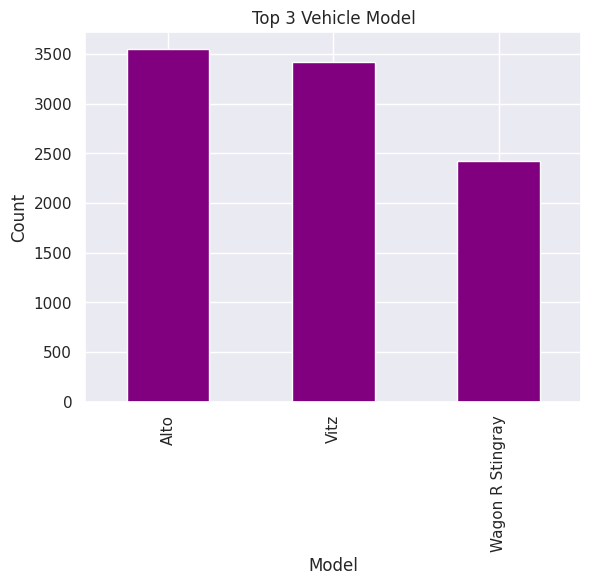

In [ ]:
#what are the top3 models
top3_models = vehicle_df.Model.value_counts().head(3)

#show top3 models in a plot
top3_models.plot(kind="bar", color="purple")
plt.title("Top 3 Vehicle Model")
plt.xlabel("Model")
plt.ylabel("Count")

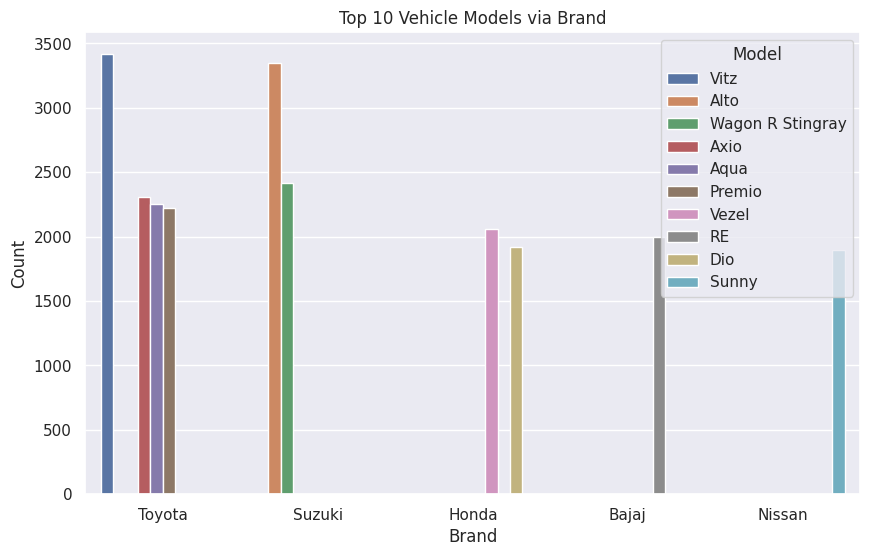

In [ ]:
#group data by brand and model
brand_model = vehicle_df.groupby(["Brand", "Model"]).size().reset_index(name="Count")

#retrieve top 5 brand and model
top10_brand_model = brand_model.sort_values(by="Count", ascending=False).head(10)

#plot top 5 brand and model
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_brand_model, x="Brand", y="Count", hue="Model")
plt.title("Top 10 Vehicle Models via Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

#### Edition

In [ ]:
#inspect edition column
vehicle_df.Edition

,Edition
0,Limited
1,Fully Loaded
2,GT New Face 2wd
3,Toyato
4,prado
...,...
123966,NaN
123967,NaN
123968,NaN
123969,NaN


In [ ]:
#check number of null values in Edition column
vehicle_df.Edition.isnull().sum()

76433

In [ ]:
#how many unique editions
print(f"There are {vehicle_df.Edition.nunique()} unique editions.")

There are 15260 unique editions.


In [ ]:
#count unique editions
vehicle_df.Edition.value_counts()

,count
Edition,
Toyota,780
G Grade,629
G Superior,608
Suzuki,390
-,346
...,...
106 hilux 4wd,1
SURF 4WD,1
Extreme Full Option,1


#### Year

In [ ]:
#view first 5 samples of year column
vehicle_df.Year.head()

,Year
0,2017
1,2013
2,2020
3,2017
4,2015


In [ ]:
#what year occurs the most
vehicle_df.Year.value_counts()

,count
Year,
2015,11547
2017,11066
2018,10228
2016,8768
2014,7878
...,...
1937,1
2557,1
2561,1


In [ ]:
#unique years represented
vehicle_df.Year.unique()

array([2017, 2013, 2020, 2015, 2007, 2018, 2019, 2016, 2008, 1995, 2012,
       2014, 2010, 1985, 2003, 2005, 1999, 2004, 2001, 2011, 1982, 1989,
       1980, 2006, 2009, 1993, 2000, 1990, 1988, 1981, 1983, 1979, 2002,
       1978, 1991, 1996, 1997, 1984, 2021, 1998, 1987, 1986, 1992, 1994,
       1960, 1975, 1958, 1971, 1976, 1956, 1959, 1953, 1967, 1969, 1973,
       1972, 1951, 1955, 1946, 1968, 1961, 1970, 1974, 1966, 1977, 1937,
       1963, 1947, 1952, 1965, 1950, 1927, 1957, 1964, 1945, 1935, 1936,
       1938, 1962, 1922, 2022, 1954,    0, 1948, 1900, 2557, 2561, 2550,
       1949])

In [ ]:
#replace invalid years (0, 2557, 2561, 2550) with NaN
vehicle_df.Year = vehicle_df.Year.replace([0, 2557, 2561, 2550], np.nan)

In [ ]:
#how many years are represented?
vehicle_df.Year.nunique()

85

In [ ]:
#range of years represented
range = vehicle_df.Year.sort_values().unique()
print(f"The years represented range from {range[0]} to {range[-2]}.")

The years represented range from 1900.0 to 2022.0.


#### Condition

In [ ]:
#view unique vehicle condition
vehicle_df.Condition.unique()

array(['Used', 'Reconditioned', 'New', 'e', 'Recondition'], dtype=object)

In [ ]:
#count values in vehicle condition column
vehicle_df.Condition.value_counts()

,count
Condition,
Used,120207
Reconditioned,1465
Recondition,1076
e,617
New,606


In [ ]:
#replace recondition with reconditioned and e with NaN
vehicle_df.Condition = vehicle_df.Condition.replace({"Recondition": "Reconditioned", "e": np.nan})

In [ ]:
#confirm changes
vehicle_df.Condition.value_counts()

,count
Condition,
Used,120207
Reconditioned,2541
New,606


In [ ]:
#check for missing values in condition column
vehicle_df.Condition.isna().sum()

617

#### Transmission

In [ ]:
#view the transmission column
vehicle_df.Transmission

,Transmission
0,Automatic
1,Automatic
2,Automatic
3,Automatic
4,Automatic
...,...
123966,Automatic
123967,Manual
123968,Manual
123969,Automatic


In [ ]:
#what unique types of transmission are there?
vehicle_df.Transmission.unique()

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission', '2001',
       '11', '150', '2', '0', '1490', '1000', '444444444', '450', nan,
       '205', '200', '125', '1200', '50', '175', '1500', '650'],
      dtype=object)

In [ ]:
#display value counts of unique transmission
vehicle_df.Transmission.value_counts()

,count
Transmission,
Automatic,75620
Manual,42954
Tiptronic,5319
Other transmission,45
205,5
150,5
175,4
0,4
1500,2


In [ ]:
#we see some invalid transmission types in the transmission column
#create list of valid transmission types
valid_transmissions = ["Automatic", "Manual", "Tiptronic", "Other transmission"]

#use list to filter out invalid transmission type
vehicle_df = vehicle_df[vehicle_df.Transmission.isin(valid_transmissions)]

In [ ]:
#confirm changes
vehicle_df.Transmission.value_counts()

,count
Transmission,
Automatic,75620
Manual,42954
Tiptronic,5319
Other transmission,45


#### Body

In [ ]:
#inspect body column
vehicle_df.Body

,Body
0,SUV / 4x4
1,Saloon
2,SUV / 4x4
3,SUV / 4x4
4,SUV / 4x4
...,...
123966,Car
123967,Unregistered
123968,Three Wheel
123969,Car


In [ ]:
#check unique values in body column
vehicle_df.Body.unique()

array(['SUV / 4x4', 'Saloon', nan, 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon', 'Lorry', 'Van', 'Motorbike',
       'Pickup', 'Car', 'Three Wheel', 'SUV', 'Brand', 'Wagon', 'Other',
       'Tractor', 'Unregistered', 'Bus', 'Heavy-Duty', 'Cab'],
      dtype=object)

In [ ]:
#replace SUV/4x4 with SUV
vehicle_df.Body = vehicle_df.Body.replace("SUV / 4x4", "SUV")

In [ ]:
#get unique values in body column to confirm changes
vehicle_df.Body.unique()

array(['SUV', 'Saloon', nan, 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon', 'Lorry', 'Van', 'Motorbike',
       'Pickup', 'Car', 'Three Wheel', 'Brand', 'Wagon', 'Other',
       'Tractor', 'Unregistered', 'Bus', 'Heavy-Duty', 'Cab'],
      dtype=object)

In [ ]:
#group or add unregistered to other values in the body column
vehicle_df.Body = vehicle_df.Body.replace("Unregistered", "Other")

In [ ]:
#confirm changes
vehicle_df.Body.value_counts()

,count
Body,
Car,21981
Hatchback,21031
Saloon,18810
SUV,16223
Motorbike,15723
Van,5593
Three Wheel,5078
Lorry,4245
Station wagon,2683


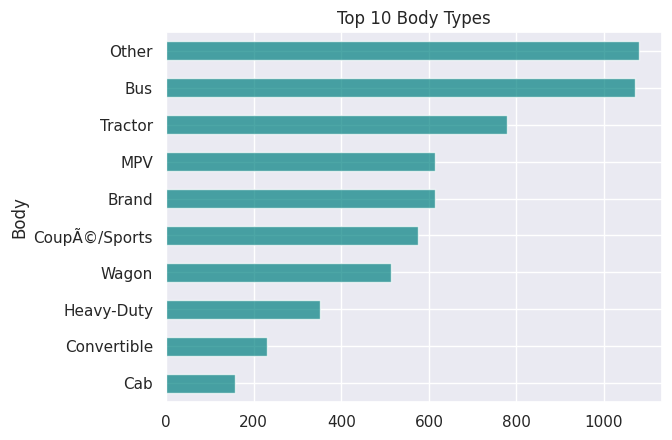

In [ ]:
#top 10 body types
top10_body = vehicle_df.Body.value_counts().sort_values(ascending=True).head(10)

#plot top 10 body types
top10_body.plot(kind="barh", color="teal", alpha=0.7)
plt.title("Top 10 Body Types")
plt.show()

In [ ]:
#check for missing values in Body column
vehicle_df.Body.isna().sum()

5095

#### Fuel

In [ ]:
#what kind of fuel do the vehicles use?
vehicle_df.Fuel.unique()

array(['Hybrid', 'Diesel', 'Petrol', 'CNG', 'Electric', 'Other fuel type',
       'Gas'], dtype=object)

In [ ]:
#what are the top 3 fuel models used
vehicle_df.Fuel.value_counts()[:3]

,count
Fuel,
Petrol,86702
Diesel,22771
Hybrid,13846


#### Capacity

In [ ]:
#capacity
vehicle_df.Capacity.head()

,Capacity
0,"1,500 cc"
1,"2,200 cc"
2,"1,200 cc"
3,"1,200 cc"
4,"2,700 cc"


In [ ]:
#convert values in capacity column to int
#first, we replace the commas and cc
vehicle_df.Capacity = vehicle_df.Capacity.str.replace(",", "")
vehicle_df.Capacity = vehicle_df.Capacity.str.replace("cc", "")

#next, convert to numeric column
vehicle_df.Capacity = pd.to_numeric(vehicle_df.Capacity, errors="coerce")

In [ ]:
#view changes in capacity column
vehicle_df.Capacity.head()

,Capacity
0,1500.0
1,2200.0
2,1200.0
3,1200.0
4,2700.0


In [ ]:
#average capacity of a vehicle
mean_capacity = vehicle_df.Capacity.mean()
print(f"The average capacity of a vehicle is {mean_capacity:.2f} cc.")

The average capacity of a vehicle is 13049.15 cc.


#### Mileage

In [ ]:
#view first 5 rows of mileage column
vehicle_df.Mileage.head()

,Mileage
0,"37,000 km"
1,"42,000 km"
2,"15,000 km"
3,"21,000 km"
4,"57,000 km"


In [ ]:
#convert values in mileage column to int
#first, we replace the commas and km
vehicle_df.Mileage = vehicle_df.Mileage.str.replace(",", "")
vehicle_df.Mileage = vehicle_df.Mileage.str.replace("km", "")

#next, convert to numeric column
vehicle_df.Mileage = pd.to_numeric(vehicle_df.Mileage, errors="coerce")

In [ ]:
#view changes
vehicle_df.Mileage.head()

,Mileage
0,37000.0
1,42000.0
2,15000.0
3,21000.0
4,57000.0


In [ ]:
#average miles travelled
mean_mileage = vehicle_df.Mileage.mean()
print(f"The average mileage of a vehicle is {mean_mileage:.2f}.")

The average mileage of a vehicle is 361088.92.


#### Location

In [ ]:
#view unique values in location column
vehicle_df.Location.unique()

array([' Kurunegala City,  Kurunegala', ' Colombo 7,  Colombo',
       ' Kelaniya,  Gampaha', ' Gampaha City,  Gampaha',
       ' Maharagama,  Colombo', ' Angoda,  Colombo',
       ' Boralesgamuwa,  Colombo', ' Galle City,  Galle',
       ' Rambukkana,  Kegalle', ' Ruwanwella,  Kegalle',
       ' Negombo,  Gampaha', ' Nugegoda,  Colombo',
       ' Anuradhapura City,  Anuradhapura', ' Kohuwala,  Colombo',
       ' Ragama,  Gampaha', ' Katugastota,  Kandy',
       ' Wennappuwa,  Puttalam', ' Embilipitiya,  Ratnapura',
       ' Colombo 2,  Colombo', ' Panadura,  Kalutara',
       ' Piliyandala,  Colombo', ' Digana,  Kandy',
       ' Tissamaharama,  Hambantota', ' Dehiwala,  Colombo',
       ' Godagama,  Colombo', ' Kaduwela,  Colombo', ' Wattala,  Gampaha',
       ' Malabe,  Colombo', ' Kottawa,  Colombo', ' Kotte,  Colombo',
       ' Colombo 6,  Colombo', ' Battaramulla,  Colombo',
       ' Colombo 4,  Colombo', ' Jaffna City,  Jaffna',
       ' Ja-Ela,  Gampaha', ' Kandana,  Gampaha', '

In [ ]:
#get number of unique locations present
vehicle_df.Location.nunique()

328

#### Description & Post Url

In [ ]:
#view contents of description and post url columns
vehicle_df[["Description", "Post_URL"]]

,Description,Post_URL
0,HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...
1,1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...
2,2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...
3,Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...
4,Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...
...,...,...
123966,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-insight-ze3-s...
123967,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/hino-dutro-sale-col...
123968,-,https://riyasewana.com/buy/tvs-king-sale-colom...
123969,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ta...


#### Seller Name & Type

In [ ]:
#view content of seller name and seller type columns
vehicle_df[["Seller_name", "Seller_type"]]

,Seller_name,Seller_type
0,Prasad Enterprises,Premium-Member
1,Dhanushka Dharmasri,Member
2,Carzone Lanka,Member
3,Carzone Lanka,Member
4,Shine Music Center,Member
...,...,...
123966,Duminda,Member
123967,Areej,Member
123968,Safan,Member
123969,Sampath Kodithuwakku,Member


In [ ]:
#inspect uniqueness of seller type column
vehicle_df["Seller_type"].unique()

array(['Premium-Member', 'Member'], dtype=object)

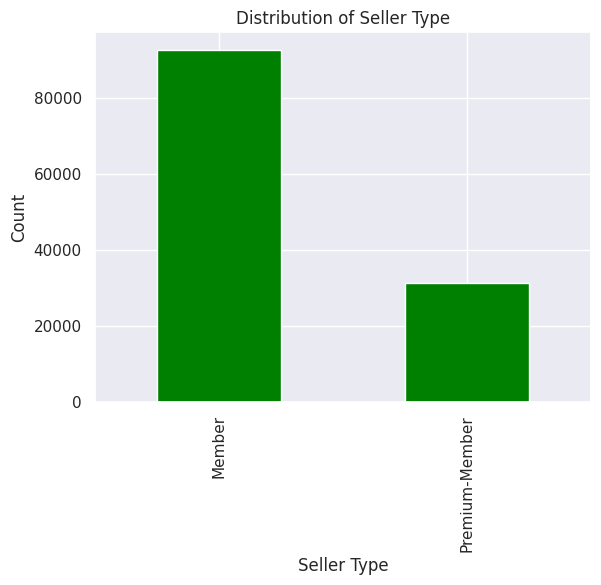

In [ ]:
#view distribution of seller type
vehicle_df["Seller_type"].value_counts()

#plot distribution
vehicle_df["Seller_type"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.show()

#### Published Date

In [ ]:
#view published date column
vehicle_df["published_date"]

,published_date
0,2022-09-01 14:45:00
1,2022-09-28 10:23:00
2,2022-09-16 13:16:00
3,2022-09-30 10:12:00
4,2022-09-30 21:50:00
...,...
123966,2021-11-04 23:41:00
123967,2021-11-04 23:39:00
123968,2021-11-04 23:38:00
123969,2021-11-04 23:38:00


#### Redundant Features

After careful observation of the features, it was concluded that some of the features such as the title, subtitle, description, among others had no bearing on the target variable "Price". It was therefore imperative to have them removed.

In [ ]:
#drop redundant columns
vehicle_df = vehicle_df.drop(["Title", "Sub_title", "Seller_name", "published_date", "Description", "Post_URL"], axis=1)
vehicle_df.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Seller_type
0,"Rs 12,900,000",Honda,Vezel,Limited,2017.0,Used,Automatic,SUV,Hybrid,1500.0,37000.0,"Kurunegala City, Kurunegala",Premium-Member
1,"Rs 16,250,000",Jaguar,XF,Fully Loaded,2013.0,Used,Automatic,Saloon,Diesel,2200.0,42000.0,"Kurunegala City, Kurunegala",Member
2,"Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020.0,Used,Automatic,SUV,Petrol,1200.0,15000.0,"Colombo 7, Colombo",Member
3,"Rs 13,000,000",Toyota,CHR,Toyato,2017.0,Used,Automatic,SUV,Petrol,1200.0,21000.0,"Colombo 7, Colombo",Member
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015.0,Used,Automatic,SUV,Petrol,2700.0,57000.0,"Kelaniya, Gampaha",Member


In [ ]:
#view changes
vehicle_df.columns

Index(['Price', 'Brand', 'Model', 'Edition', 'Year', 'Condition',
       'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage', 'Location',
       'Seller_type'],
      dtype='object')

#### Price (Target Variable)

In [ ]:
#view first few rows of price
vehicle_df.Price.head()

,Price
0,"Rs 12,900,000"
1,"Rs 16,250,000"
2,"Rs 17,000,000"
3,"Rs 13,000,000"
4,"Rs 33,500,000"


In [ ]:
#get stats of price column
vehicle_df.Price.describe()

,Price
count,123938
unique,5318
top,Negotiable
freq,5508


In [ ]:
#get value counts
vehicle_df.Price.value_counts()

,count
Price,
Negotiable,5508
"Rs 6,500,000",361
"Rs 5,500,000",354
"Rs 8,500,000",334
"Rs 7,500,000",314
...,...
"Rs 1,282,000",1
"Rs 13,740,000",1
"Rs. 6,670,000",1


In [ ]:
#convert values in price column to int
#first, we replace the commas and km
vehicle_df.Price = vehicle_df.Price.str.replace(",", "")
vehicle_df.Price = vehicle_df.Price.str.replace("Rs", "")

#next, convert to numeric column
vehicle_df.Price = pd.to_numeric(vehicle_df.Price, errors="coerce")

In [ ]:
#view changes in price column
vehicle_df.Price.head()

,Price
0,12900000.0
1,16250000.0
2,17000000.0
3,13000000.0
4,33500000.0


In [ ]:
#what is the average price of a vehicle
average_price = vehicle_df.Price.mean()
print(f"The average price of a vehicle is Rs {average_price:.2f}.")

The average price of a vehicle is Rs 9196272.72.


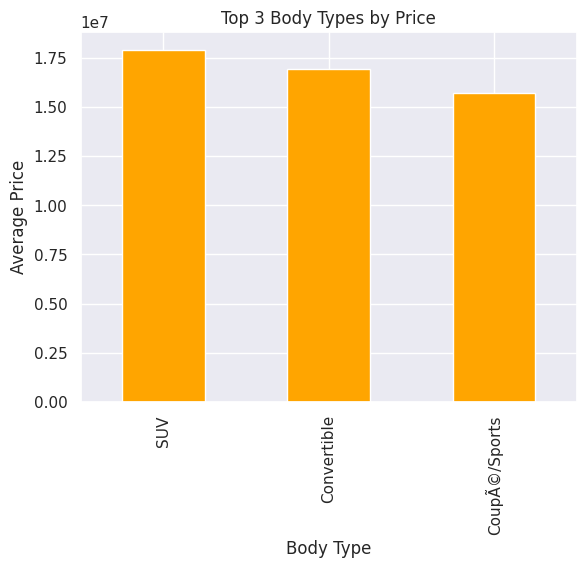

In [ ]:
#body types by price
body_price = vehicle_df.groupby("Body")["Price"].mean()

#top 3 body typbes by price
top3_body_price = body_price.sort_values(ascending=False).head(3)

#plot top 3 body types by price
top3_body_price.plot(kind="bar", color="orange")
plt.title("Top 3 Body Types by Price")
plt.xlabel("Body Type")
plt.ylabel("Average Price")
plt.show()

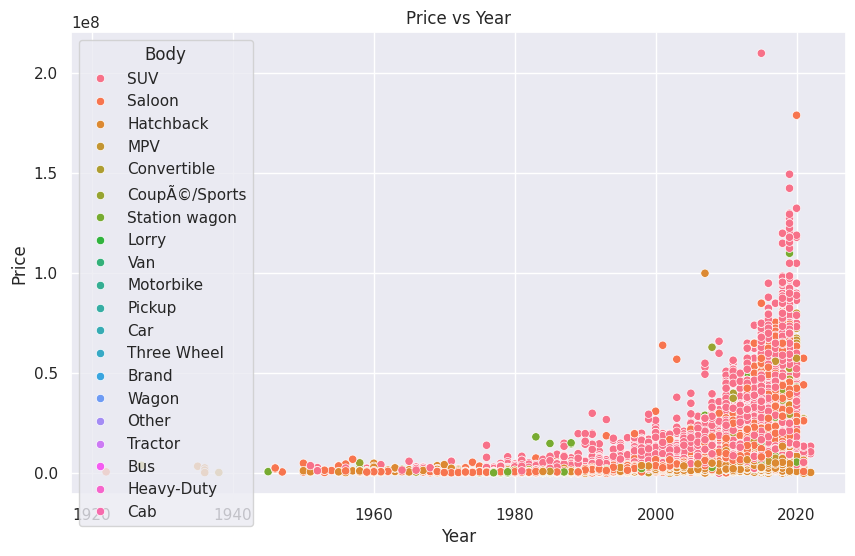

In [ ]:
#scatter plot showing relationship between price and year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vehicle_df, x="Year", y="Price", hue="Body")
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

### Missing Values Handling

Here, we handle missing values. If missing values greater than 51% of the length of column, the column is dropped. If less than 5% of the length of column, the rows are dropped. Otherwise, missing values are filled by imputation.

In [ ]:
#get sum of missing values across columns
vehicle_df.isnull().sum()

,0
Price,62258
Brand,0
Model,1
Edition,76400
Year,19
Condition,614
Transmission,0
Body,5095
Fuel,0
Capacity,4752


In [ ]:
#calculate missing percentage
missing_percentage = vehicle_df.isna().sum() / len(vehicle_df) * 100
print(missing_percentage)

Price           50.233181
Brand            0.000000
Model            0.000807
Edition         61.643725
Year             0.015330
Condition        0.495409
Transmission     0.000000
Body             4.110926
Fuel             0.000000
Capacity         3.834175
Mileage          4.578095
Location         0.000000
Seller_type      0.000000
dtype: float64


#### Handle missing values greater than 51% of sample size

In [ ]:
#drop edition column due to missing values over 51% threshold
vehicle_df.drop("Edition", axis=1, inplace=True)

#### Imputation of missing values in price column by regression

There are about 50% or half the values of the target variable "Price" missing. Here we try to impute the missing values using regression.

In [ ]:
#split the dataset into rows with and without missing values in the price column
price_missing = vehicle_df[vehicle_df["Price"].isna()]
price_not_missing = vehicle_df[~vehicle_df["Price"].isna()]

In [ ]:
#view shape of price_missing and price_not_missing splitted dataframe
display(price_missing.shape, price_not_missing.shape)

(62258, 12)

(61680, 12)

In [ ]:
#split the dataset without missing values into features and target variables
X = price_not_missing.drop("Price", axis=1)
y = price_not_missing["Price"]

In [ ]:
#get features from dataset with missing values as well
#this would be used as our test data to get missing values/predictions after training
X_missing = price_missing.drop("Price", axis=1)

In [ ]:
#convert cat columns available to numeric in preparation for training
X = pd.get_dummies(X, drop_first=True)
X_missing = pd.get_dummies(X_missing, drop_first=True)

In [ ]:
#check shape after conversion using dummies
display(X.shape, X_missing.shape)

(61680, 888)

(62258, 8532)

In [ ]:
#we have to align the columns of the features from those with missing values
#with those without missing values to ensure they have same structure
X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

In [ ]:
#check shape again
display(X.shape, X_missing.shape)
print()
print("All good!")

(61680, 888)

(62258, 888)


All good!


In [ ]:
#time to train the regressor to predict missing prices
model = RandomForestRegressor(random_state=36)
model.fit(X, y)

RandomForestRegressor(random_state=36)

In [ ]:
#time to predict the missing prices
predicted_prices = model.predict(X_missing)
predicted_prices

array([2013069.04761905, 4775075.        , 3603076.19047619, ...,
       4756916.66666667, 7822811.9047619 , 2782930.83333333])

In [ ]:
#time to fill missing values with predictions in the original dataset
vehicle_df.loc[vehicle_df["Price"].isna(), "Price"] = predicted_prices

In [ ]:
#confirm missing values have been imputed in the price column
vehicle_df["Price"].isna().sum()

0

#### Handle missing values < 5%

In [ ]:
#check missing % again
missing_percentage = vehicle_df.isna().sum() / len(vehicle_df) * 100
print(missing_percentage)

Price           0.000000
Brand           0.000000
Model           0.000807
Year            0.015330
Condition       0.495409
Transmission    0.000000
Body            4.110926
Fuel            0.000000
Capacity        3.834175
Mileage         4.578095
Location        0.000000
Seller_type     0.000000
dtype: float64


In [ ]:
#the dataset now contains less than 5% null values across features
#drop rows containing remaining missing values < 5%
vehicle_df.dropna(inplace=True)

In [ ]:
#confirm missing values have been handled in dataset
if vehicle_df.isna().sum().sum() == 0:
    print("Hurray!!! There are no more missing values in the dataset.")
else:
    print("Keep cleaning!")

Hurray!!! There are no more missing values in the dataset.


### Rename Columns

In [ ]:
#rename price, mileage, and capacity columns to reflect their units
vehicle_df.rename(columns={"Price": "Price (Rs)", "Mileage": "Mileage (km)", \
                           "Capacity": "Capacity (cc)"}, inplace=True)

In [ ]:
#view changes
vehicle_df.columns

Index(['Price (Rs)', 'Brand', 'Model', 'Year', 'Condition', 'Transmission',
       'Body', 'Fuel', 'Capacity (cc)', 'Mileage (km)', 'Location',
       'Seller_type'],
      dtype='object')

### Data Preprocessing & Preparation

#### Feature Engineering

In [ ]:
#create new price column in pound sterling
vehicle_df["Price (GBP)"] = vehicle_df["Price (Rs)"] * 0.0027

#round decimal values in price new price column to 2 places
vehicle_df["Price (GBP)"] = vehicle_df["Price (GBP)"].round(2)

#drop old price column
vehicle_df.drop("Price (Rs)", axis=1, inplace=True)

#view new column
vehicle_df["Price (GBP)"].head()

,Price (GBP)
0,34830.0
1,43875.0
2,45900.0
3,35100.0
4,90450.0


In [ ]:
#check info
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109748 entries, 0 to 123970
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Brand          109748 non-null  object 
 1   Model          109748 non-null  object 
 2   Year           109748 non-null  float64
 3   Condition      109748 non-null  object 
 4   Transmission   109748 non-null  object 
 5   Body           109748 non-null  object 
 6   Fuel           109748 non-null  object 
 7   Capacity (cc)  109748 non-null  float64
 8   Mileage (km)   109748 non-null  float64
 9   Location       109748 non-null  object 
 10  Seller_type    109748 non-null  object 
 11  Price (GBP)    109748 non-null  float64
dtypes: float64(4), object(8)
memory usage: 10.9+ MB


In [ ]:
#convert categorical data to numeric for machine learning
#by mapping the frequencies of their values to original values
cat_columns = vehicle_df.select_dtypes(include="object").columns

for col in cat_columns:
    freq_encoding = vehicle_df[col].value_counts()
    vehicle_df[col] = vehicle_df[col].map(freq_encoding)

In [ ]:
#confirm changes
vehicle_df.sample(10)

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type,Price (GBP)
18931,11547,99,2010.0,106951,69596,18810,78083,2400.0,119000.0,559,80928,18360.00
42893,1177,66,2001.0,106951,35020,15994,78083,1700.0,146000.0,517,28820,11205.00
47982,1160,216,2017.0,106951,5093,21031,78083,1000.0,28000.0,69,80928,37665.00
83952,1943,1,2019.0,106951,69596,14248,78083,115.0,2600.0,5220,80928,27290.56
27311,28549,3167,2015.0,2253,69596,21031,78083,1000.0,22337.0,725,28820,14553.00
11282,8441,290,2013.0,106951,69596,21031,445,70.0,100156.0,106,80928,5737.50
115325,16256,113,2014.0,106951,69596,20339,78083,660.0,49600.0,2165,80928,12396.71
64366,28549,203,2013.0,106951,69596,20339,78083,1500.0,85000.0,360,80928,16930.87
31257,28549,1711,2014.0,106951,69596,21031,12965,1800.0,171500.0,2789,28820,18900.00
52866,28549,1010,2006.0,106951,69596,18810,78083,1500.0,212000.0,1902,80928,17685.00


In [ ]:
#check new shape of dataframe
print(f"The DataFrame now contains {vehicle_df.shape[0]} rows and {vehicle_df.shape[1]} columns.")

The DataFrame now contains 109748 rows and 12 columns.


In [ ]:
#check correlation between features
correlation = vehicle_df.corr()
correlation

,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type,Price (GBP)
Brand,1.000000,0.446097,0.033257,0.004815,0.254446,0.204882,-0.043029,-0.003727,-0.006796,-0.050715,-0.054890,-0.008061
Model,0.446097,1.000000,0.152294,0.005157,0.120352,0.287498,0.056897,-0.001132,-0.009375,-0.109651,-0.130463,-0.051368
Year,0.033257,0.152294,1.000000,-0.079608,0.335255,0.128909,-0.000803,0.000359,-0.015087,0.088408,-0.109910,0.367490
Condition,0.004815,0.005157,-0.079608,1.000000,-0.008564,0.089461,-0.012857,0.000537,0.001931,-0.028639,0.098331,-0.101751
Transmission,0.254446,0.120352,0.335255,-0.008564,1.000000,0.235254,0.040498,-0.002043,-0.007829,0.063920,-0.054147,0.083602
Body,0.204882,0.287498,0.128909,0.089461,0.235254,1.000000,0.186272,-0.004998,-0.015222,-0.075765,-0.202093,0.011129
Fuel,-0.043029,0.056897,-0.000803,-0.012857,0.040498,0.186272,1.000000,-0.001631,-0.000864,-0.001061,0.001647,-0.113951
Capacity (cc),-0.003727,-0.001132,0.000359,0.000537,-0.002043,-0.004998,-0.001631,1.000000,0.041864,-0.001933,0.002926,0.002847
Mileage (km),-0.006796,-0.009375,-0.015087,0.001931,-0.007829,-0.015222,-0.000864,0.041864,1.000000,-0.001112,0.008489,-0.006856
Location,-0.050715,-0.109651,0.088408,-0.028639,0.063920,-0.075765,-0.001061,-0.001933,-0.001112,1.000000,0.021618,0.063618


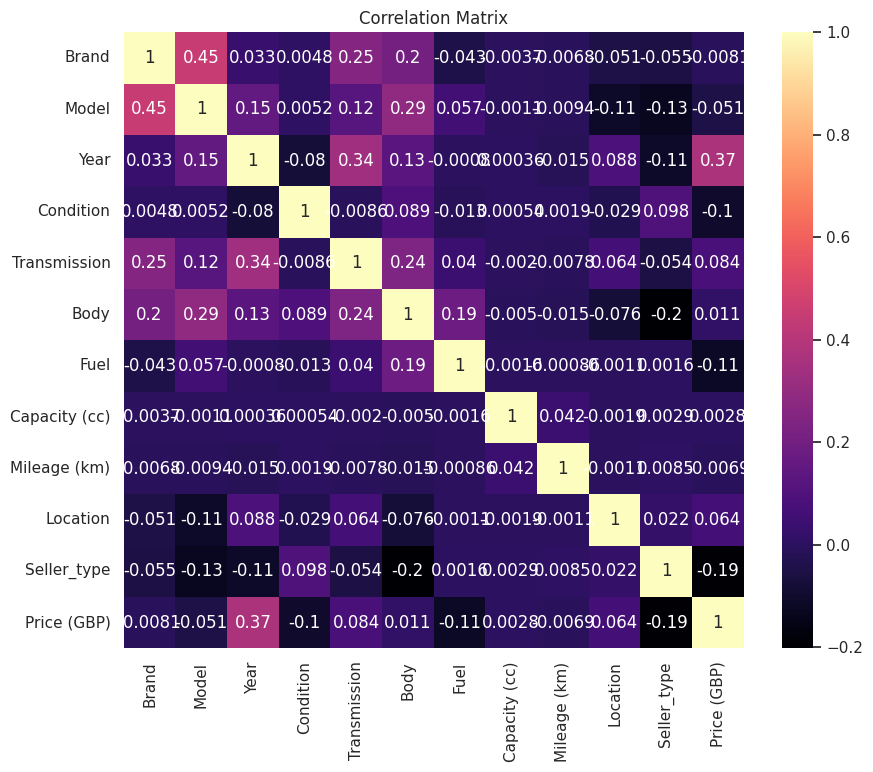

In [ ]:
#plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="magma")
plt.title("Correlation Matrix")
plt.show()

#### Data Splitting

First Split

In [ ]:
#split into features and target
X = vehicle_df.drop("Price (GBP)", axis=1)
y = vehicle_df["Price (GBP)"]

In [ ]:
#check shape of features
print(f"There are {X.shape[1]} features with a total of {X.shape[0]} samples.")
print()
#view first few rows of features
X.head()

There are 11 features with a total of 109748 samples.



,Brand,Model,Year,Condition,Transmission,Body,Fuel,Capacity (cc),Mileage (km),Location,Seller_type
0,11547,1810,2017.0,106951,69596,15994,12965,1500.0,37000.0,954,28820
1,131,44,2013.0,106951,69596,18810,18171,2200.0,42000.0,954,80928
2,28549,829,2020.0,106951,69596,15994,78083,1200.0,15000.0,396,80928
3,28549,829,2017.0,106951,69596,15994,78083,1200.0,21000.0,396,80928
4,28549,1411,2015.0,106951,69596,15994,78083,2700.0,57000.0,567,80928


In [ ]:
#view target variable
y.head()

,Price (GBP)
0,34830.0
1,43875.0
2,45900.0
3,35100.0
4,90450.0


Second Split

In [ ]:
#split data into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=36)

In [ ]:
#display shape of splitted feature data
display(X_train.shape, X_val.shape, X_test.shape)

(79018, 11)

(8780, 11)

(21950, 11)

In [ ]:
#display shape of splitted target data
display(y_train.shape, y_val.shape, y_test.shape)

(79018,)

(8780,)

(21950,)

#### Feature Scaling

In [ ]:
#feature scaling
#instantiating the standard scaler
scaler = StandardScaler()

#fit scaler to X_train
scaler.fit(X_train)

#transform X_train , X_val, and X_test
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Models Development

### Baseline Model - Linear Regressor

Build Model

In [ ]:
#initialize the baseline model
baseline_model = LinearRegression()

#train baseline
baseline_model.fit(X_train, y_train)

LinearRegression()

Get Predictions

In [ ]:
#get prediction on the validation set
y_val_pred_bl = baseline_model.predict(X_val)

#get mse
mse_val_bl = mean_squared_error(y_val, y_val_pred_bl)

#calculate rmse
rmse_val_bl = np.sqrt(mse_val_bl)

#get r2 score
r2_val_bl = r2_score(y_val, y_val_pred_bl)

#display scores
print(f"Validation Baseline Model - Root Mean Squared Error: {rmse_val_bl:.2f}")
print(f"Validation Baseline Model - R-squared Score: {r2_val_bl:.2f}")

Validation Baseline Model - Root Mean Squared Error: 21091.22
Validation Baseline Model - R-squared Score: 0.20


#### Features Importance

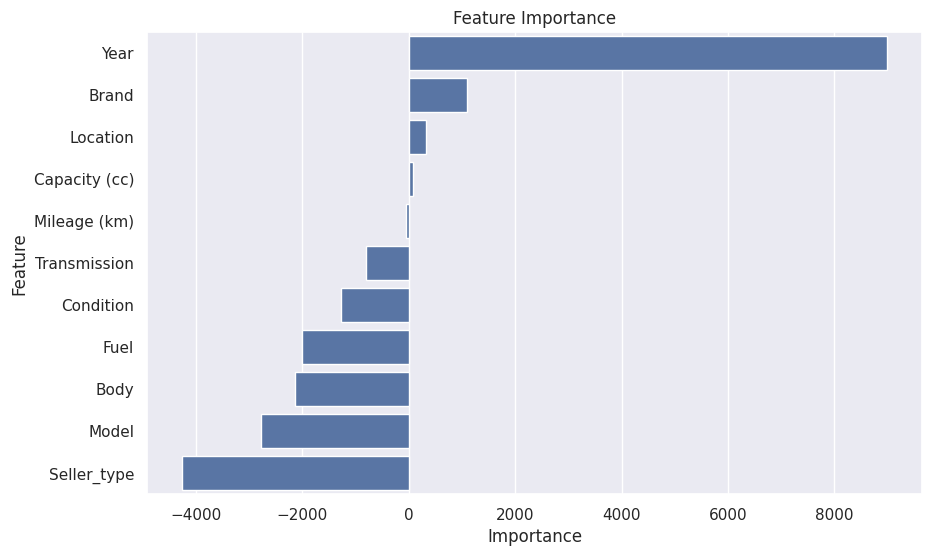

In [ ]:
#get features importance for baseline model
feature_importance_bl = pd.DataFrame({"Feature": X.columns, "Importance": baseline_model.coef_})

#sort features in order of importance
feature_importance_bl = feature_importance_bl.sort_values(by="Importance", ascending=False)

#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_bl)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model One - DecisionTree Regressor

Build Model

In [ ]:
#initialize model one
model1 = DecisionTreeRegressor(random_state=36)

#train model
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

Get Predictions

In [ ]:
#get predictions on X_val
y_val_pred1 = model1.predict(X_val)

#get mse
mse1_val = mean_squared_error(y_val, y_val_pred1)

#calculate rmse
rmse1_val = np.sqrt(mse1_val)

#get r2 score
r2_val1 = r2_score(y_val, y_val_pred1)

#display scores
print(f"Validation Model One - Root Mean Squared Error: {rmse1_val:.2f}")
print(f"Validation Model One - R-squared Score: {r2_val1:.2f}")

Validation Model One - Root Mean Squared Error: 8060.25
Validation Model One - R-squared Score: 0.88


#### Hyperparameter Tuning

In [ ]:
#initialize decisiontree regressor
model1 = DecisionTreeRegressor(random_state=36)

#define parameters in grid search
param_grid =  {
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

#create grid search
grid_search = GridSearchCV(
    model1,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

#perform the search
grid_search.fit(X_train, y_train)

#retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#display best parameters
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_split': 10}


In [ ]:
#model one tuning
#train model1 using best parameters from grid search
model1 = DecisionTreeRegressor(criterion="squared_error", max_depth=30, min_samples_split=10, random_state=36)
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=10, random_state=36)

In [ ]:
#get predictions on x_val
y_val_pred1 = model1.predict(X_val)

#get mse
mse1_val = mean_squared_error(y_val, y_val_pred1)

#calculate rmse
rmse1_val = np.sqrt(mse1_val)

#get r2 score
r2_val1 = r2_score(y_val, y_val_pred1)

#display scores
print(f"Validation Model One (After Tuning) - Root Mean Squared Error: {rmse1_val:.2f}")
print(f"Validation Model One (After Tuning) - R-squared Score: {r2_val1:.2f}")

Validation Model One (After Tuning) - Root Mean Squared Error: 7854.62
Validation Model One (After Tuning) - R-squared Score: 0.89


#### Features Importance

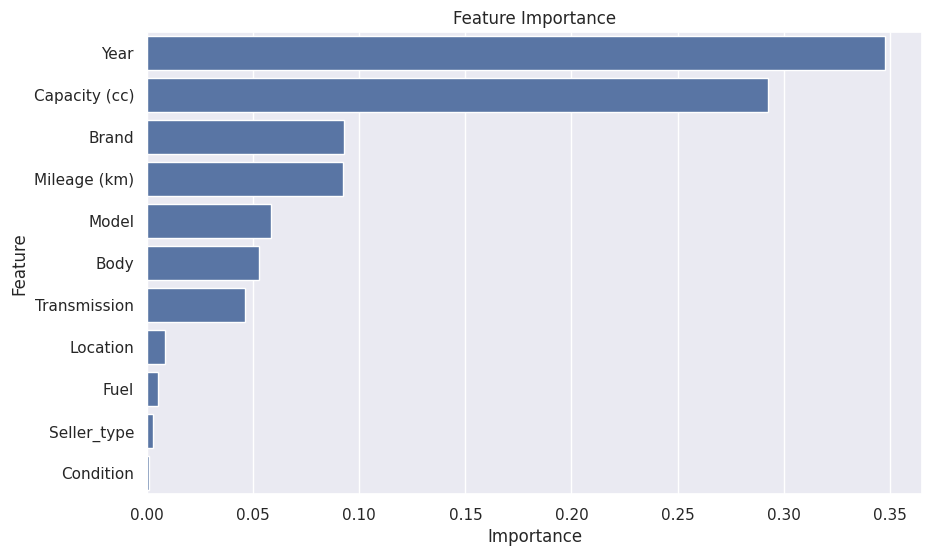

In [ ]:
#get features importance for model one
feature_importance1 = pd.DataFrame({"Feature": X.columns, "Importance": model1.feature_importances_})

#sort features in order of importance
feature_importance1 = feature_importance1.sort_values(by="Importance", ascending=False)

#plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance1)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model Two - kNeighbors Regressor

Build Model

In [ ]:
#initialize model two
model2 = KNeighborsRegressor()

#train model
model2.fit(X_train, y_train)

KNeighborsRegressor()

Get Predictions

In [ ]:
#get predictions on X_val
y_val_pred2 = model2.predict(X_val)

#get mse
mse2_val = mean_squared_error(y_val, y_val_pred2)

#calculate rmse
rmse2_val = np.sqrt(mse2_val)

#get r2 score
r2_val2 = r2_score(y_val, y_val_pred2)

#display scores
print(f"Validation Model Two - Root Mean Squared Error: {rmse2_val:.2f}")
print(f"Validation Model Two - R-squared Score: {r2_val2:.2f}")

Validation Model Two - Root Mean Squared Error: 11204.50
Validation Model Two - R-squared Score: 0.77


#### Hyperparameter Tuning

In [ ]:
#initialize kneighbors regressor
model2 = KNeighborsRegressor()

#define parameters in grid search
param_grid = {
    "n_neighbors": [3, 5, 10],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

#create grid search
grid_search = GridSearchCV(
    model2,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

#perform the search
grid_search.fit(X_train, y_train)

#retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#display best parameters
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
#model two tuning
#train model2 using best parameters from grid search
model2 = KNeighborsRegressor(n_neighbors=10, weights="distance", metric="manhattan")
model2.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
#get predictions on x_val
y_val_pred2 = model2.predict(X_val)

#get mse
mse2_val = mean_squared_error(y_val, y_val_pred2)

#calculate rmse
rmse2_val = np.sqrt(mse2_val)

#get r2 score
r2_val2 = r2_score(y_val, y_val_pred2)

#display scores
print(f"Validation Model Two (After Tuning) - Root Mean Squared Error: {rmse2_val:.2f}")
print(f"Validation Model Two (After Tuning) - R-squared Score: {r2_val2:.2f}")

Validation Model Two (After Tuning) - Root Mean Squared Error: 9117.53
Validation Model Two (After Tuning) - R-squared Score: 0.85


#### Features Importance

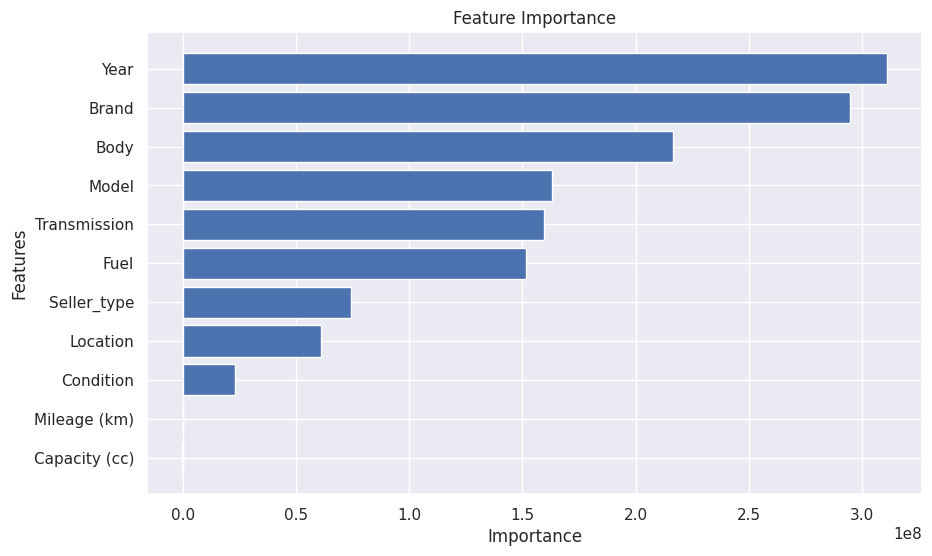

In [ ]:
#get features importance for model two
#calculate permutation importance
perm_importance = permutation_importance(model2,
                                         X_val,
                                         y_val,
                                         n_repeats=10,
                                         scoring="neg_mean_squared_error",
                                         random_state=36)

#get features importance
feature_importance2 = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})

#sort features in order of importance
feature_importance2 = feature_importance2.sort_values(by="Importance", ascending=False)

#plot features importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance2)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model Three - Random Forest Regressor



Build Model

In [ ]:
#initialize model three
model3 = RandomForestRegressor(random_state=36)

#train model
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=36)

Get Predictions

In [ ]:
#get predictions on X_val
y_val_pred3 = model3.predict(X_val)

#get mse
mse3_val = mean_squared_error(y_val, y_val_pred3)

#calculate rmse
rmse3_val = np.sqrt(mse3_val)

#get r2 score
r2_val3 = r2_score(y_val, y_val_pred3)

#display scores
print(f"Validation Model Three - Root Mean Squared Error: {rmse3_val:.2f}")
print(f"Validation Model Three - R-squared Score: {r2_val3:.2f}")

Validation Model Three - Root Mean Squared Error: 6127.58
Validation Model Three - R-squared Score: 0.93


#### Hyperparameter Tuning

In [ ]:
#initialize random forest regressor
model3 = RandomForestRegressor(random_state=36)

#define parameters in grid search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "max_features": ["sqrt", "log2"]
}

#create grid search
grid_search = GridSearchCV(
    model3,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

#perform grid search
grid_search.fit(X_train, y_train)

#retrieve best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#display best parameters
print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
#model3 tuning
#train model3 using best parameters from grid search
model3 = RandomForestRegressor(n_estimators=300, max_depth=30, max_features="sqrt", random_state=36)
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=300,
                      random_state=36)

In [ ]:
#get predictions on X_val
y_val_pred3 = model3.predict(X_val)

#get mse
mse3_val = mean_squared_error(y_val, y_val_pred3)

#calculate rmse
rmse3_val = np.sqrt(mse3_val)

#get r2 score
r2_val3 = r2_score(y_val, y_val_pred3)

#display scores
print(f"Validation Model Three (After Tuning) - Root Mean Squared Error: {rmse3_val:.2f}")
print(f"Validation Model Three (After Tuning) - R-squared Score: {r2_val3:.2f}")

Validation Model Three (After Tuning) - Root Mean Squared Error: 5720.82
Validation Model Three (After Tuning) - R-squared Score: 0.94


#### Features Importance

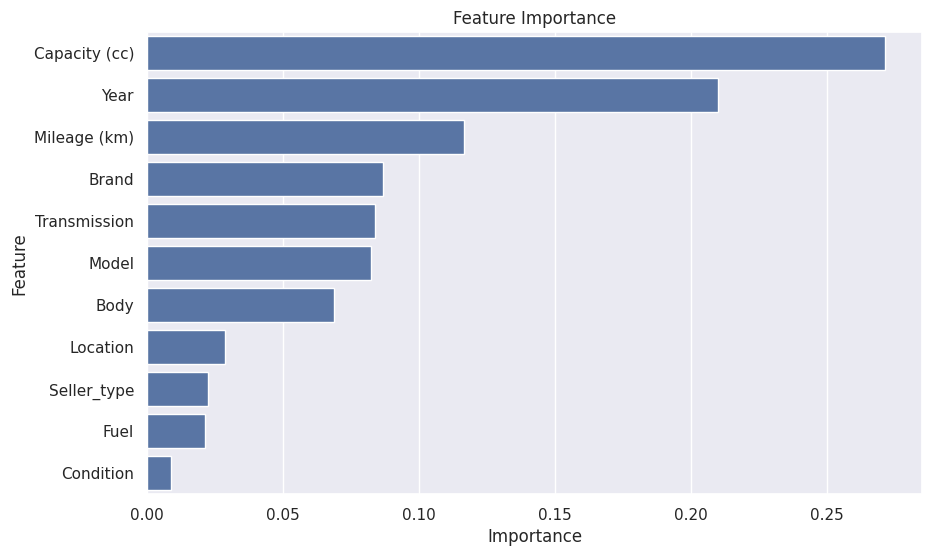

In [ ]:
#get features importance for model three
features_importance3 = pd.DataFrame({"Feature": X.columns, "Importance": model3.feature_importances_})

#sort features in order of importance
features_importance3 = features_importance3.sort_values(by="Importance", ascending=False)

#plot features importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=features_importance3)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Model Four - Neural Network

Build Model

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#model architecture
model4 = Sequential()
model4.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(1))

#set learning rate
learning_rate = 0.001

#set optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set parameters
epochs = 50
batch_size = 32

#fit model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 5s - 2ms/step - loss: 459892352.0000 - val_loss: 368520704.0000
Epoch 2/50
2470/2470 - 7s - 3ms/step - loss: 369363808.0000 - val_loss: 338598752.0000
Epoch 3/50
2470/2470 - 8s - 3ms/step - loss: 347002720.0000 - val_loss: 321691872.0000
Epoch 4/50
2470/2470 - 6s - 3ms/step - loss: 328605824.0000 - val_loss: 305173312.0000
Epoch 5/50
2470/2470 - 4s - 1ms/step - loss: 310288800.0000 - val_loss: 288060672.0000
Epoch 6/50
2470/2470 - 5s - 2ms/step - loss: 294515296.0000 - val_loss: 273906016.0000
Epoch 7/50
2470/2470 - 6s - 2ms/step - loss: 281429248.0000 - val_loss: 261899168.0000
Epoch 8/50
2470/2470 - 4s - 2ms/step - loss: 272843712.0000 - val_loss: 253152576.0000
Epoch 9/50
2470/2470 - 6s - 2ms/step - loss: 262903584.0000 - val_loss: 246280464.0000
Epoch 10/50
2470/2470 - 4s - 2ms/step - loss: 256148224.0000 - val_loss: 240974896.0000
Epoch 11/50
2470/2470 - 4s - 2ms/step - loss: 250844016.0000 - val_loss: 236819344.0000
Epoch 12/50
2470/2470 - 4s - 2ms/step - l

In [ ]:
#get summary
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,717 (139.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,812 (93.02 KB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 199299936.00


Get Predictions

In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Model Four - Root Mean Squared Error: 14117.36
Validation Model Four - R-squared Score: 0.64


#### Hyperparameter Tuning & Optimization

##### Neurons

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set up model architecture
model4 = Sequential()
model4.add(Dense(256,input_dim=X_train.shape[1],activation="relu"))
model4.add(Dense(128, activation="relu"))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(1))

#create optimizer
optimizer = Adam(learning_rate=0.001)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 50
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 6s - 2ms/step - loss: 432364416.0000 - val_loss: 349691904.0000
Epoch 2/50
2470/2470 - 5s - 2ms/step - loss: 363333248.0000 - val_loss: 328149824.0000
Epoch 3/50
2470/2470 - 6s - 2ms/step - loss: 337705888.0000 - val_loss: 313314560.0000
Epoch 4/50
2470/2470 - 4s - 2ms/step - loss: 321734784.0000 - val_loss: 300519392.0000
Epoch 5/50
2470/2470 - 7s - 3ms/step - loss: 308525216.0000 - val_loss: 288280608.0000
Epoch 6/50
2470/2470 - 4s - 2ms/step - loss: 294184960.0000 - val_loss: 272824320.0000
Epoch 7/50
2470/2470 - 11s - 4ms/step - loss: 278477024.0000 - val_loss: 259049440.0000
Epoch 8/50
2470/2470 - 7s - 3ms/step - loss: 264532384.0000 - val_loss: 247982704.0000
Epoch 9/50
2470/2470 - 9s - 4ms/step - loss: 252436448.0000 - val_loss: 239089792.0000
Epoch 10/50
2470/2470 - 4s - 2ms/step - loss: 242949024.0000 - val_loss: 232746800.0000
Epoch 11/50
2470/2470 - 5s - 2ms/step - loss: 236398880.0000 - val_loss: 228031376.0000
Epoch 12/50
2470/2470 - 10s - 4ms/step -

In [ ]:
#get summary
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,869 (519.02 KB)

 Trainable params: 44,289 (173.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,580 (346.02 KB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 175411696.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Model Four - Root Mean Squared Error: 13244.31
Validation Model Four - R-squared Score: 0.68


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#increasing the number of neurons further in each layer
model4 = Sequential()
model4.add(Dense(512,input_dim=X_train.shape[1],activation="relu"))
model4.add(Dense(256, activation="relu"))
model4.add(Dense(128,activation="relu"))
model4.add(Dense(1))

#create optimizer
optimizer = Adam(learning_rate=0.001)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 50
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 13s - 5ms/step - loss: 465771744.0000 - val_loss: 340680448.0000
Epoch 2/50
2470/2470 - 21s - 8ms/step - loss: 362446720.0000 - val_loss: 309728704.0000
Epoch 3/50
2470/2470 - 13s - 5ms/step - loss: 317114592.0000 - val_loss: 284752256.0000
Epoch 4/50
2470/2470 - 20s - 8ms/step - loss: 287107904.0000 - val_loss: 259219296.0000
Epoch 5/50
2470/2470 - 21s - 8ms/step - loss: 259215936.0000 - val_loss: 236353312.0000
Epoch 6/50
2470/2470 - 13s - 5ms/step - loss: 240693664.0000 - val_loss: 224237424.0000
Epoch 7/50
2470/2470 - 12s - 5ms/step - loss: 231039440.0000 - val_loss: 218488320.0000
Epoch 8/50
2470/2470 - 11s - 5ms/step - loss: 225009888.0000 - val_loss: 214759792.0000
Epoch 9/50
2470/2470 - 12s - 5ms/step - loss: 219642096.0000 - val_loss: 211464304.0000
Epoch 10/50
2470/2470 - 21s - 9ms/step - loss: 219934800.0000 - val_loss: 207903200.0000
Epoch 11/50
2470/2470 - 21s - 8ms/step - loss: 211686464.0000 - val_loss: 206247792.0000
Epoch 12/50
2470/2470 - 12s - 

In [ ]:
#get summary
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,493 (1.95 MB)

 Trainable params: 170,497 (666.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 340,996 (1.30 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 146136160.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Model Four - Root Mean Squared Error: 12088.68
Validation Model Four - R-squared Score: 0.74


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#increasing the number of neurons further in each layer
model4 = Sequential()
model4.add(Dense(2048,input_dim=X_train.shape[1],activation="relu"))
model4.add(Dense(1024, activation="relu"))
model4.add(Dense(512,activation="relu"))
model4.add(Dense(1))

#create optimizer
optimizer = Adam(learning_rate=0.001)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 50
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 109s - 44ms/step - loss: 2769136384.0000 - val_loss: 292166464.0000
Epoch 2/50
2470/2470 - 141s - 57ms/step - loss: 713994048.0000 - val_loss: 246570656.0000
Epoch 3/50
2470/2470 - 141s - 57ms/step - loss: 270843584.0000 - val_loss: 230330832.0000
Epoch 4/50
2470/2470 - 142s - 57ms/step - loss: 233972928.0000 - val_loss: 220242688.0000
Epoch 5/50
2470/2470 - 141s - 57ms/step - loss: 225717120.0000 - val_loss: 215264032.0000
Epoch 6/50
2470/2470 - 143s - 58ms/step - loss: 220464672.0000 - val_loss: 212054032.0000
Epoch 7/50
2470/2470 - 144s - 58ms/step - loss: 215694304.0000 - val_loss: 210345312.0000
Epoch 8/50
2470/2470 - 143s - 58ms/step - loss: 210109232.0000 - val_loss: 210689392.0000
Epoch 9/50
2470/2470 - 142s - 57ms/step - loss: 205165744.0000 - val_loss: 206640208.0000
Epoch 10/50
2470/2470 - 142s - 58ms/step - loss: 207366080.0000 - val_loss: 200600896.0000
Epoch 11/50
2470/2470 - 108s - 44ms/step - loss: 196644912.0000 - val_loss: 198765248.0000
Epoch 1

In [ ]:
#get summary
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2048)                │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,944,197 (30.30 MB)

 Trainable params: 2,648,065 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,296,132 (20.20 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 132055520.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Validation Model Four - Root Mean Squared Error: 11491.54
Validation Model Four - R-squared Score: 0.76


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#increasing the number of neurons further in each layer
model4 = Sequential()
model4.add(Dense(1024,input_dim=X_train.shape[1],activation="relu"))
model4.add(Dense(512, activation="relu"))
model4.add(Dense(256,activation="relu"))
model4.add(Dense(1))

#create optimizer
optimizer = Adam(learning_rate=0.001)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 50
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 42s - 17ms/step - loss: 1069804352.0000 - val_loss: 323515296.0000
Epoch 2/50
2470/2470 - 42s - 17ms/step - loss: 510268800.0000 - val_loss: 271436640.0000
Epoch 3/50
2470/2470 - 73s - 30ms/step - loss: 305554528.0000 - val_loss: 247467520.0000
Epoch 4/50
2470/2470 - 39s - 16ms/step - loss: 254836976.0000 - val_loss: 232462736.0000
Epoch 5/50
2470/2470 - 32s - 13ms/step - loss: 237292352.0000 - val_loss: 224459904.0000
Epoch 6/50
2470/2470 - 32s - 13ms/step - loss: 228034080.0000 - val_loss: 218781024.0000
Epoch 7/50
2470/2470 - 40s - 16ms/step - loss: 221165760.0000 - val_loss: 214289776.0000
Epoch 8/50
2470/2470 - 42s - 17ms/step - loss: 215430992.0000 - val_loss: 210932752.0000
Epoch 9/50
2470/2470 - 39s - 16ms/step - loss: 217077296.0000 - val_loss: 206986320.0000
Epoch 10/50
2470/2470 - 33s - 13ms/step - loss: 206853392.0000 - val_loss: 205469264.0000
Epoch 11/50
2470/2470 - 32s - 13ms/step - loss: 203071536.0000 - val_loss: 203919920.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,006,021 (7.65 MB)

 Trainable params: 668,673 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,337,348 (5.10 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 126938160.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11266.68
Validation Model Four - R-squared Score: 0.77


##### Learning Rate

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set learning rate to 0.01
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 100
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 34s - 14ms/step - loss: 951340096.0000 - val_loss: 224375664.0000
Epoch 2/50
2470/2470 - 42s - 17ms/step - loss: 620263936.0000 - val_loss: 210956368.0000
Epoch 3/50
2470/2470 - 40s - 16ms/step - loss: 243104368.0000 - val_loss: 208060576.0000
Epoch 4/50
2470/2470 - 32s - 13ms/step - loss: 186481408.0000 - val_loss: 202046864.0000
Epoch 5/50
2470/2470 - 34s - 14ms/step - loss: 180079440.0000 - val_loss: 193954816.0000
Epoch 6/50
2470/2470 - 33s - 13ms/step - loss: 174806304.0000 - val_loss: 179167680.0000
Epoch 7/50
2470/2470 - 32s - 13ms/step - loss: 167671296.0000 - val_loss: 175274512.0000
Epoch 8/50
2470/2470 - 32s - 13ms/step - loss: 164518128.0000 - val_loss: 175957120.0000
Epoch 9/50
2470/2470 - 41s - 16ms/step - loss: 161895376.0000 - val_loss: 176024096.0000
Epoch 10/50
2470/2470 - 43s - 17ms/step - loss: 157811088.0000 - val_loss: 176107600.0000
Epoch 11/50
2470/2470 - 32s - 13ms/step - loss: 154669168.0000 - val_loss: 165296288.0000
Epoch 12/50
2470/24

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 123860712.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Validation Model Four - Root Mean Squared Error: 11129.28
Validation Model Four - R-squared Score: 0.78


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set learning rate to 0.1
learning_rate = 0.1

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs to 100
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 34s - 14ms/step - loss: 570678464.0000 - val_loss: 556180352.0000
Epoch 2/50
2470/2470 - 31s - 13ms/step - loss: 570671552.0000 - val_loss: 556176256.0000
Epoch 3/50
2470/2470 - 51s - 21ms/step - loss: 570670592.0000 - val_loss: 556174080.0000
Epoch 4/50
2470/2470 - 75s - 30ms/step - loss: 570669696.0000 - val_loss: 556172160.0000
Epoch 5/50
2470/2470 - 33s - 13ms/step - loss: 570669504.0000 - val_loss: 556170240.0000
Epoch 6/50
2470/2470 - 31s - 13ms/step - loss: 570669248.0000 - val_loss: 556168704.0000
Epoch 7/50
2470/2470 - 32s - 13ms/step - loss: 570668736.0000 - val_loss: 556166912.0000
Epoch 8/50
2470/2470 - 41s - 17ms/step - loss: 570667712.0000 - val_loss: 556164864.0000
Epoch 9/50
2470/2470 - 33s - 13ms/step - loss: 570667392.0000 - val_loss: 556163328.0000
Epoch 10/50
2470/2470 - 33s - 14ms/step - loss: 570666176.0000 - val_loss: 556161280.0000
Epoch 11/50
2470/2470 - 33s - 13ms/step - loss: 570665984.0000 - val_loss: 556159616.0000
Epoch 12/50
2470/24

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 556061568.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 23580.96
Validation Model Four - R-squared Score: -0.00


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set learning rate to 0.0001
learning_rate = 0.0001

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 38s - 15ms/step - loss: 570756544.0000 - val_loss: 556038016.0000
Epoch 2/50
2470/2470 - 32s - 13ms/step - loss: 570737856.0000 - val_loss: 556015616.0000
Epoch 3/50
2470/2470 - 32s - 13ms/step - loss: 570721472.0000 - val_loss: 555994432.0000
Epoch 4/50
2470/2470 - 34s - 14ms/step - loss: 570706112.0000 - val_loss: 555974784.0000
Epoch 5/50
2470/2470 - 32s - 13ms/step - loss: 570691008.0000 - val_loss: 555956352.0000
Epoch 6/50
2470/2470 - 43s - 17ms/step - loss: 570677760.0000 - val_loss: 555938752.0000
Epoch 7/50
2470/2470 - 32s - 13ms/step - loss: 570664704.0000 - val_loss: 555922432.0000
Epoch 8/50
2470/2470 - 32s - 13ms/step - loss: 570653632.0000 - val_loss: 555907136.0000
Epoch 9/50
2470/2470 - 32s - 13ms/step - loss: 570642048.0000 - val_loss: 555892864.0000
Epoch 10/50
2470/2470 - 34s - 14ms/step - loss: 570632960.0000 - val_loss: 555879488.0000
Epoch 11/50
2470/2470 - 34s - 14ms/step - loss: 570622784.0000 - val_loss: 555866944.0000
Epoch 12/50
2470/24

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 555681984.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Validation Model Four - Root Mean Squared Error: 23572.90
Validation Model Four - R-squared Score: -0.00


##### Layers

In [ ]:
batch_size = 32

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#model architecture
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(1024,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model five
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 150

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/150
2470/2470 - 98s - 40ms/step - loss: 1571849216.0000 - val_loss: 289875584.0000
Epoch 2/150
2470/2470 - 144s - 58ms/step - loss: 252083872.0000 - val_loss: 239145072.0000
Epoch 3/150
2470/2470 - 142s - 58ms/step - loss: 235394448.0000 - val_loss: 227791712.0000
Epoch 4/150
2470/2470 - 141s - 57ms/step - loss: 229216048.0000 - val_loss: 224375136.0000
Epoch 5/150
2470/2470 - 97s - 39ms/step - loss: 223124528.0000 - val_loss: 220920672.0000
Epoch 6/150
2470/2470 - 141s - 57ms/step - loss: 201286576.0000 - val_loss: 211031392.0000
Epoch 7/150
2470/2470 - 95s - 39ms/step - loss: 190265264.0000 - val_loss: 210433872.0000
Epoch 8/150
2470/2470 - 96s - 39ms/step - loss: 187235456.0000 - val_loss: 201675056.0000
Epoch 9/150
2470/2470 - 142s - 57ms/step - loss: 176740400.0000 - val_loss: 195524496.0000
Epoch 10/150
2470/2470 - 95s - 39ms/step - loss: 171171472.0000 - val_loss: 191693744.0000
Epoch 11/150
2470/2470 - 143s - 58ms/step - loss: 167942496.0000 - val_loss: 184962512.0000
E

In [ ]:
#get summary
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,154,821 (19.66 MB)

 Trainable params: 1,718,273 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,436,548 (13.11 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 127480568.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Validation Model Four - Root Mean Squared Error: 11287.69
Validation Model Four - R-squared Score: 0.77


##### Drop Out

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#model architecture by implementing drop out
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu"
                 )
)
model4.add(Dropout(0.5))
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu"
                 )
)
model4.add(Dropout(0.5))
model4.add(Dense(512,
                 activation="relu"
                 )
)
model4.add(Dropout(0.5))
model4.add(Dense(256,
                 activation="relu",
                 )
)
model4.add(Dropout(0.5))
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 71s - 29ms/step - loss: 3802907648.0000 - val_loss: 271436032.0000
Epoch 2/50
2470/2470 - 83s - 33ms/step - loss: 635113344.0000 - val_loss: 346653792.0000
Epoch 3/50
2470/2470 - 83s - 34ms/step - loss: 876250368.0000 - val_loss: 374401984.0000
Epoch 4/50
2470/2470 - 81s - 33ms/step - loss: 583547456.0000 - val_loss: 316556480.0000
Epoch 5/50
2470/2470 - 81s - 33ms/step - loss: 366042624.0000 - val_loss: 324517408.0000
Epoch 6/50
2470/2470 - 83s - 33ms/step - loss: 355790848.0000 - val_loss: 364161536.0000
Epoch 7/50
2470/2470 - 69s - 28ms/step - loss: 364016096.0000 - val_loss: 350724096.0000
Epoch 8/50
2470/2470 - 84s - 34ms/step - loss: 355381664.0000 - val_loss: 357840736.0000
Epoch 9/50
2470/2470 - 81s - 33ms/step - loss: 859501376.0000 - val_loss: 368491616.0000
Epoch 10/50
2470/2470 - 82s - 33ms/step - loss: 372246720.0000 - val_loss: 347078752.0000
Epoch 11/50
2470/2470 - 71s - 29ms/step - loss: 365454848.0000 - val_loss: 335717088.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,154,821 (19.66 MB)

 Trainable params: 1,718,273 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,436,548 (13.11 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 292536896.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Model Four - Root Mean Squared Error: 17103.71
Validation Model Four - R-squared Score: 0.47


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#model architecture by implementing drop out
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dropout(0.2))
model4.add(Dense(512,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dropout(0.2))
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dropout(0.2))
model4.add(Dense(128,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dropout(0.2))
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 38s - 15ms/step - loss: 5306158592.0000 - val_loss: 266756208.0000
Epoch 2/50
2470/2470 - 40s - 16ms/step - loss: 584858368.0000 - val_loss: 301355808.0000
Epoch 3/50
2470/2470 - 43s - 17ms/step - loss: 335366784.0000 - val_loss: 235808080.0000
Epoch 4/50
2470/2470 - 36s - 15ms/step - loss: 336666240.0000 - val_loss: 216747840.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 291082496.0000 - val_loss: 241178928.0000
Epoch 6/50
2470/2470 - 41s - 17ms/step - loss: 272373152.0000 - val_loss: 245487728.0000
Epoch 7/50
2470/2470 - 34s - 14ms/step - loss: 267346992.0000 - val_loss: 225034352.0000
Epoch 8/50
2470/2470 - 41s - 17ms/step - loss: 261109760.0000 - val_loss: 223685424.0000
Epoch 9/50
2470/2470 - 42s - 17ms/step - loss: 251630432.0000 - val_loss: 223152176.0000
Epoch 10/50
2470/2470 - 40s - 16ms/step - loss: 246645728.0000 - val_loss: 215209392.0000
Epoch 11/50
2470/2470 - 35s - 14ms/step - loss: 241509136.0000 - val_loss: 205614592.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,104,325 (8.03 MB)

 Trainable params: 701,441 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,402,884 (5.35 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 156233216.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Validation Model Four - Root Mean Squared Error: 12498.90
Validation Model Four - R-squared Score: 0.72


##### Early Stopping

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#retrain model 4 for a further 100 epochs and introduce early stopping
#set epochs
epochs = 50

#set early stopping
monitor = EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10, verbose=2)

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val),
    callbacks=[monitor])

Epoch 1/50
2470/2470 - 36s - 15ms/step - loss: 191881024.0000 - val_loss: 154563920.0000
Epoch 2/50
2470/2470 - 43s - 17ms/step - loss: 271683968.0000 - val_loss: 149174864.0000
Epoch 3/50
2470/2470 - 39s - 16ms/step - loss: 192473984.0000 - val_loss: 150025248.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 185514608.0000 - val_loss: 158850256.0000
Epoch 5/50
2470/2470 - 41s - 16ms/step - loss: 180779664.0000 - val_loss: 144825760.0000
Epoch 6/50
2470/2470 - 37s - 15ms/step - loss: 185245472.0000 - val_loss: 169606720.0000
Epoch 7/50
2470/2470 - 40s - 16ms/step - loss: 186506624.0000 - val_loss: 152209616.0000
Epoch 8/50
2470/2470 - 36s - 15ms/step - loss: 187153120.0000 - val_loss: 174569072.0000
Epoch 9/50
2470/2470 - 41s - 16ms/step - loss: 612133312.0000 - val_loss: 172512192.0000
Epoch 10/50
2470/2470 - 40s - 16ms/step - loss: 208089888.0000 - val_loss: 140005456.0000
Epoch 11/50
2470/2470 - 42s - 17ms/step - loss: 180217088.0000 - val_loss: 146765248.0000
Epoch 12/50
2470/24

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 168979744.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Model Four - Root Mean Squared Error: 12998.69
Validation Model Four - R-squared Score: 0.70


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#retrain model 4 for a further 50 epochs
#set epochs
epochs = 50

#set early stopping
monitor = EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, verbose=2)

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val),
    callbacks=[monitor])

Epoch 1/50
2470/2470 - 37s - 15ms/step - loss: 164334400.0000 - val_loss: 144251904.0000
Epoch 2/50
2470/2470 - 36s - 15ms/step - loss: 168787760.0000 - val_loss: 193560416.0000
Epoch 3/50
2470/2470 - 41s - 17ms/step - loss: 167016000.0000 - val_loss: 171156288.0000
Epoch 4/50
2470/2470 - 40s - 16ms/step - loss: 178901632.0000 - val_loss: 186501232.0000
Epoch 5/50
2470/2470 - 45s - 18ms/step - loss: 173015200.0000 - val_loss: 151026352.0000
Epoch 6/50
2470/2470 - 36s - 15ms/step - loss: 162681616.0000 - val_loss: 156487312.0000
Epoch 6: early stopping


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Model Four - Root Mean Squared Error: 12508.84
Validation Model Four - R-squared Score: 0.72


##### Regularizers

###### Lasso Regularizers - L1

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#modify architecture by adding l1 regularizers
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.01)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.01)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.01)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 39s - 16ms/step - loss: 1055937920.0000 - val_loss: 323037760.0000
Epoch 2/50
2470/2470 - 37s - 15ms/step - loss: 513859264.0000 - val_loss: 273789152.0000
Epoch 3/50
2470/2470 - 40s - 16ms/step - loss: 308228608.0000 - val_loss: 249771440.0000
Epoch 4/50
2470/2470 - 40s - 16ms/step - loss: 256657248.0000 - val_loss: 233396160.0000
Epoch 5/50
2470/2470 - 37s - 15ms/step - loss: 238243184.0000 - val_loss: 224554464.0000
Epoch 6/50
2470/2470 - 41s - 16ms/step - loss: 228979024.0000 - val_loss: 219110000.0000
Epoch 7/50
2470/2470 - 41s - 16ms/step - loss: 221823520.0000 - val_loss: 214600896.0000
Epoch 8/50
2470/2470 - 40s - 16ms/step - loss: 215624224.0000 - val_loss: 210982784.0000
Epoch 9/50
2470/2470 - 41s - 17ms/step - loss: 248348576.0000 - val_loss: 205990224.0000
Epoch 10/50
2470/2470 - 41s - 17ms/step - loss: 206193488.0000 - val_loss: 204734544.0000
Epoch 11/50
2470/2470 - 41s - 17ms/step - loss: 202628080.0000 - val_loss: 202063424.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,006,021 (7.65 MB)

 Trainable params: 668,673 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,337,348 (5.10 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 127630016.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11297.23
Validation Model Four - R-squared Score: 0.77


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set regularizers to 1e-3
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 57s - 23ms/step - loss: 1051092096.0000 - val_loss: 323556480.0000
Epoch 2/50
2470/2470 - 67s - 27ms/step - loss: 483080192.0000 - val_loss: 273563552.0000
Epoch 3/50
2470/2470 - 38s - 16ms/step - loss: 310474560.0000 - val_loss: 248766240.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 255992784.0000 - val_loss: 233291424.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 238520080.0000 - val_loss: 225870960.0000
Epoch 6/50
2470/2470 - 41s - 17ms/step - loss: 229094688.0000 - val_loss: 220199120.0000
Epoch 7/50
2470/2470 - 42s - 17ms/step - loss: 221701840.0000 - val_loss: 215728400.0000
Epoch 8/50
2470/2470 - 40s - 16ms/step - loss: 215556240.0000 - val_loss: 211397904.0000
Epoch 9/50
2470/2470 - 40s - 16ms/step - loss: 228679648.0000 - val_loss: 205636272.0000
Epoch 10/50
2470/2470 - 42s - 17ms/step - loss: 205763408.0000 - val_loss: 203495168.0000
Epoch 11/50
2470/2470 - 40s - 16ms/step - loss: 201835040.0000 - val_loss: 200783408.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 126149904.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Validation Model Four - Root Mean Squared Error: 11231.63
Validation Model Four - R-squared Score: 0.77


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set regularizers to 1e-4
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.0001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.0001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.0001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 41s - 17ms/step - loss: 1061359104.0000 - val_loss: 321716320.0000
Epoch 2/50
2470/2470 - 45s - 18ms/step - loss: 512192320.0000 - val_loss: 276024960.0000
Epoch 3/50
2470/2470 - 76s - 31ms/step - loss: 305644224.0000 - val_loss: 249466688.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 256798672.0000 - val_loss: 232868176.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 237459328.0000 - val_loss: 223757856.0000
Epoch 6/50
2470/2470 - 50s - 20ms/step - loss: 227268576.0000 - val_loss: 217754240.0000
Epoch 7/50
2470/2470 - 71s - 29ms/step - loss: 219870976.0000 - val_loss: 213282992.0000
Epoch 8/50
2470/2470 - 43s - 17ms/step - loss: 214227072.0000 - val_loss: 209905968.0000
Epoch 9/50
2470/2470 - 41s - 17ms/step - loss: 218679264.0000 - val_loss: 205944032.0000
Epoch 10/50
2470/2470 - 37s - 15ms/step - loss: 205754128.0000 - val_loss: 204936528.0000
Epoch 11/50
2470/2470 - 40s - 16ms/step - loss: 202457216.0000 - val_loss: 203160864.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 123314360.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11104.70
Validation Model Four - R-squared Score: 0.78


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set regularizers to 1e-5
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.00001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.00001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1(0.00001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 37s - 15ms/step - loss: 1070640256.0000 - val_loss: 324036256.0000
Epoch 2/50
2470/2470 - 46s - 19ms/step - loss: 518601824.0000 - val_loss: 272774944.0000
Epoch 3/50
2470/2470 - 88s - 36ms/step - loss: 308818528.0000 - val_loss: 248491440.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 255807536.0000 - val_loss: 232263264.0000
Epoch 5/50
2470/2470 - 94s - 38ms/step - loss: 237312256.0000 - val_loss: 224817552.0000
Epoch 6/50
2470/2470 - 65s - 26ms/step - loss: 228048624.0000 - val_loss: 219107856.0000
Epoch 7/50
2470/2470 - 46s - 18ms/step - loss: 221066464.0000 - val_loss: 214617376.0000
Epoch 8/50
2470/2470 - 84s - 34ms/step - loss: 215391840.0000 - val_loss: 210556608.0000
Epoch 9/50
2470/2470 - 77s - 31ms/step - loss: 250464096.0000 - val_loss: 206098480.0000
Epoch 10/50
2470/2470 - 45s - 18ms/step - loss: 207443184.0000 - val_loss: 204968048.0000
Epoch 11/50
2470/2470 - 85s - 34ms/step - loss: 204245216.0000 - val_loss: 203498160.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 128428448.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Model Four - Root Mean Squared Error: 11332.63
Validation Model Four - R-squared Score: 0.77


###### Ridge Regularizers - L2

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#modify architecture by adding l2 regularizers
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.01)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.01)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.01)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 41s - 16ms/step - loss: 1074954880.0000 - val_loss: 324631680.0000
Epoch 2/50
2470/2470 - 40s - 16ms/step - loss: 511888576.0000 - val_loss: 273244768.0000
Epoch 3/50
2470/2470 - 40s - 16ms/step - loss: 300230432.0000 - val_loss: 248733312.0000
Epoch 4/50
2470/2470 - 37s - 15ms/step - loss: 254845936.0000 - val_loss: 234177552.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 238285552.0000 - val_loss: 227233744.0000
Epoch 6/50
2470/2470 - 42s - 17ms/step - loss: 229273856.0000 - val_loss: 221491408.0000
Epoch 7/50
2470/2470 - 38s - 16ms/step - loss: 222357616.0000 - val_loss: 216223024.0000
Epoch 8/50
2470/2470 - 43s - 17ms/step - loss: 216279856.0000 - val_loss: 213319792.0000
Epoch 9/50
2470/2470 - 37s - 15ms/step - loss: 211760512.0000 - val_loss: 209775872.0000
Epoch 10/50
2470/2470 - 40s - 16ms/step - loss: 207315888.0000 - val_loss: 206786496.0000
Epoch 11/50
2470/2470 - 38s - 16ms/step - loss: 203359312.0000 - val_loss: 203588912.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,006,021 (7.65 MB)

 Trainable params: 668,673 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,337,348 (5.10 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 130488952.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Model Four - Root Mean Squared Error: 11423.05
Validation Model Four - R-squared Score: 0.76


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l2 regularizers to 1e-3
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#set batch size
batch_size = 32

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 44s - 18ms/step - loss: 1042285760.0000 - val_loss: 321230944.0000
Epoch 2/50
2470/2470 - 78s - 31ms/step - loss: 480963008.0000 - val_loss: 274231232.0000
Epoch 3/50
2470/2470 - 38s - 15ms/step - loss: 305955744.0000 - val_loss: 250191296.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 258856208.0000 - val_loss: 232289984.0000
Epoch 5/50
2470/2470 - 35s - 14ms/step - loss: 238899184.0000 - val_loss: 222843088.0000
Epoch 6/50
2470/2470 - 38s - 15ms/step - loss: 228126144.0000 - val_loss: 217205904.0000
Epoch 7/50
2470/2470 - 35s - 14ms/step - loss: 220647264.0000 - val_loss: 212135248.0000
Epoch 8/50
2470/2470 - 42s - 17ms/step - loss: 214182320.0000 - val_loss: 207870400.0000
Epoch 9/50
2470/2470 - 41s - 17ms/step - loss: 209925232.0000 - val_loss: 204303680.0000
Epoch 10/50
2470/2470 - 40s - 16ms/step - loss: 203968112.0000 - val_loss: 201181920.0000
Epoch 11/50
2470/2470 - 36s - 15ms/step - loss: 199537216.0000 - val_loss: 198951488.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 128615656.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11340.87
Validation Model Four - R-squared Score: 0.77


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l2 regularizers to 1e-4
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.0001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.0001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.0001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 36s - 15ms/step - loss: 1058977536.0000 - val_loss: 324138816.0000
Epoch 2/50
2470/2470 - 41s - 16ms/step - loss: 493390880.0000 - val_loss: 275002432.0000
Epoch 3/50
2470/2470 - 41s - 17ms/step - loss: 300893216.0000 - val_loss: 248140480.0000
Epoch 4/50
2470/2470 - 41s - 16ms/step - loss: 256070656.0000 - val_loss: 233038272.0000
Epoch 5/50
2470/2470 - 41s - 17ms/step - loss: 237780624.0000 - val_loss: 224646448.0000
Epoch 6/50
2470/2470 - 43s - 17ms/step - loss: 227788032.0000 - val_loss: 218736496.0000
Epoch 7/50
2470/2470 - 40s - 16ms/step - loss: 219890816.0000 - val_loss: 213270416.0000
Epoch 8/50
2470/2470 - 41s - 17ms/step - loss: 213552080.0000 - val_loss: 209632176.0000
Epoch 9/50
2470/2470 - 40s - 16ms/step - loss: 222853776.0000 - val_loss: 204420864.0000
Epoch 10/50
2470/2470 - 36s - 15ms/step - loss: 204633312.0000 - val_loss: 202651216.0000
Epoch 11/50
2470/2470 - 34s - 14ms/step - loss: 201099488.0000 - val_loss: 200947152.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 134295040.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Validation Model Four - Root Mean Squared Error: 11588.58
Validation Model Four - R-squared Score: 0.76


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l2 regularizers to 1e-5
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.00001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.00001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l2(0.00001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 36s - 15ms/step - loss: 1071486208.0000 - val_loss: 324923456.0000
Epoch 2/50
2470/2470 - 42s - 17ms/step - loss: 521081952.0000 - val_loss: 278408480.0000
Epoch 3/50
2470/2470 - 40s - 16ms/step - loss: 306665856.0000 - val_loss: 252814720.0000
Epoch 4/50
2470/2470 - 40s - 16ms/step - loss: 259874624.0000 - val_loss: 235509984.0000
Epoch 5/50
2470/2470 - 41s - 17ms/step - loss: 239593344.0000 - val_loss: 225483184.0000
Epoch 6/50
2470/2470 - 41s - 17ms/step - loss: 228925680.0000 - val_loss: 218871856.0000
Epoch 7/50
2470/2470 - 46s - 19ms/step - loss: 221630352.0000 - val_loss: 213858320.0000
Epoch 8/50
2470/2470 - 37s - 15ms/step - loss: 215655904.0000 - val_loss: 209716720.0000
Epoch 9/50
2470/2470 - 41s - 17ms/step - loss: 223575760.0000 - val_loss: 205442784.0000
Epoch 10/50
2470/2470 - 40s - 16ms/step - loss: 206711760.0000 - val_loss: 203133232.0000
Epoch 11/50
2470/2470 - 41s - 17ms/step - loss: 202463680.0000 - val_loss: 200111920.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 134036376.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11577.41
Validation Model Four - R-squared Score: 0.76


###### Both L1 & L2

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#modify setup to use both l1 & l2 regularizers
#set l1 & l2 regularizers to 0.00001
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 42s - 17ms/step - loss: 6095730688.0000 - val_loss: 265355088.0000
Epoch 2/50
2470/2470 - 42s - 17ms/step - loss: 256246128.0000 - val_loss: 242790736.0000
Epoch 3/50
2470/2470 - 35s - 14ms/step - loss: 237345936.0000 - val_loss: 232553520.0000
Epoch 4/50
2470/2470 - 39s - 16ms/step - loss: 230343344.0000 - val_loss: 227380896.0000
Epoch 5/50
2470/2470 - 44s - 18ms/step - loss: 223499328.0000 - val_loss: 218930624.0000
Epoch 6/50
2470/2470 - 76s - 31ms/step - loss: 215673200.0000 - val_loss: 218131792.0000
Epoch 7/50
2470/2470 - 37s - 15ms/step - loss: 205921712.0000 - val_loss: 209887104.0000
Epoch 8/50
2470/2470 - 40s - 16ms/step - loss: 191675728.0000 - val_loss: 197507040.0000
Epoch 9/50
2470/2470 - 43s - 17ms/step - loss: 180594544.0000 - val_loss: 187328944.0000
Epoch 10/50
2470/2470 - 36s - 15ms/step - loss: 172212432.0000 - val_loss: 185550032.0000
Epoch 11/50
2470/2470 - 40s - 16ms/step - loss: 166614576.0000 - val_loss: 184970560.0000
Epoch 12/50
2470/2

In [ ]:
#get summary
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1024)                │          12,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,006,021 (7.65 MB)

 Trainable params: 668,673 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,337,348 (5.10 MB)

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 124227648.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11145.75
Validation Model Four - R-squared Score: 0.78


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l1 & l2 regularizers to 0.0001
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 38s - 16ms/step - loss: 6346049024.0000 - val_loss: 284334368.0000
Epoch 2/50
2470/2470 - 37s - 15ms/step - loss: 435493248.0000 - val_loss: 245787536.0000
Epoch 3/50
2470/2470 - 41s - 17ms/step - loss: 239204688.0000 - val_loss: 233375488.0000
Epoch 4/50
2470/2470 - 41s - 16ms/step - loss: 227717456.0000 - val_loss: 228089216.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 219952464.0000 - val_loss: 214931264.0000
Epoch 6/50
2470/2470 - 42s - 17ms/step - loss: 211750256.0000 - val_loss: 210464112.0000
Epoch 7/50
2470/2470 - 42s - 17ms/step - loss: 196596192.0000 - val_loss: 197988624.0000
Epoch 8/50
2470/2470 - 40s - 16ms/step - loss: 237592000.0000 - val_loss: 184623360.0000
Epoch 9/50
2470/2470 - 42s - 17ms/step - loss: 174282624.0000 - val_loss: 185320992.0000
Epoch 10/50
2470/2470 - 41s - 17ms/step - loss: 168168592.0000 - val_loss: 178272208.0000
Epoch 11/50
2470/2470 - 41s - 17ms/step - loss: 162446016.0000 - val_loss: 172179648.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 141588928.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 11899.10
Validation Model Four - R-squared Score: 0.74


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l1 & l2 regularizers to 0.001
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 40s - 16ms/step - loss: 5665570816.0000 - val_loss: 266461136.0000
Epoch 2/50
2470/2470 - 41s - 17ms/step - loss: 290988384.0000 - val_loss: 241442016.0000
Epoch 3/50
2470/2470 - 37s - 15ms/step - loss: 239442304.0000 - val_loss: 233661184.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 254980064.0000 - val_loss: 219990624.0000
Epoch 5/50
2470/2470 - 38s - 15ms/step - loss: 216170784.0000 - val_loss: 215868704.0000
Epoch 6/50
2470/2470 - 41s - 17ms/step - loss: 202499760.0000 - val_loss: 202155264.0000
Epoch 7/50
2470/2470 - 47s - 19ms/step - loss: 189233488.0000 - val_loss: 199857280.0000
Epoch 8/50
2470/2470 - 84s - 34ms/step - loss: 192581824.0000 - val_loss: 190667264.0000
Epoch 9/50
2470/2470 - 76s - 31ms/step - loss: 170291248.0000 - val_loss: 189140336.0000
Epoch 10/50
2470/2470 - 39s - 16ms/step - loss: 165040384.0000 - val_loss: 190116064.0000
Epoch 11/50
2470/2470 - 36s - 15ms/step - loss: 161400000.0000 - val_loss: 185549232.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 144273376.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Validation Model Four - Root Mean Squared Error: 12011.30
Validation Model Four - R-squared Score: 0.74


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#set l1 & l2 regularizers to 0.01
model4 = Sequential()
model4.add(Dense(1024,
                 input_dim = X_train.shape[1],
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(512,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(256,
                 activation="relu",
                 kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)
                 )
)
model4.add(Dense(1))

#set learning rate
learning_rate = 0.01

#create optimizer
optimizer = Adam(learning_rate=learning_rate)

#compile model four
model4.compile(loss="mean_squared_error", optimizer=optimizer)

#set epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 39s - 16ms/step - loss: 7532740096.0000 - val_loss: 268021840.0000
Epoch 2/50
2470/2470 - 36s - 14ms/step - loss: 286997728.0000 - val_loss: 238899696.0000
Epoch 3/50
2470/2470 - 40s - 16ms/step - loss: 248716176.0000 - val_loss: 226105568.0000
Epoch 4/50
2470/2470 - 42s - 17ms/step - loss: 278425248.0000 - val_loss: 213375424.0000
Epoch 5/50
2470/2470 - 38s - 15ms/step - loss: 206865456.0000 - val_loss: 210515776.0000
Epoch 6/50
2470/2470 - 40s - 16ms/step - loss: 199314640.0000 - val_loss: 199377120.0000
Epoch 7/50
2470/2470 - 41s - 17ms/step - loss: 186736848.0000 - val_loss: 201508960.0000
Epoch 8/50
2470/2470 - 39s - 16ms/step - loss: 178009840.0000 - val_loss: 202370336.0000
Epoch 9/50
2470/2470 - 36s - 15ms/step - loss: 171025328.0000 - val_loss: 200215488.0000
Epoch 10/50
2470/2470 - 43s - 17ms/step - loss: 164783568.0000 - val_loss: 203923200.0000
Epoch 11/50
2470/2470 - 36s - 15ms/step - loss: 161706768.0000 - val_loss: 195115120.0000
Epoch 12/50
2470/2

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 113898752.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 10670.95
Validation Model Four - R-squared Score: 0.79


##### Epochs

In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#train model 4 for a further 50 epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 38s - 15ms/step - loss: 113737808.0000 - val_loss: 108876744.0000
Epoch 2/50
2470/2470 - 36s - 15ms/step - loss: 68016688.0000 - val_loss: 107229288.0000
Epoch 3/50
2470/2470 - 42s - 17ms/step - loss: 69117464.0000 - val_loss: 109361808.0000
Epoch 4/50
2470/2470 - 40s - 16ms/step - loss: 63950164.0000 - val_loss: 120791664.0000
Epoch 5/50
2470/2470 - 38s - 15ms/step - loss: 65762044.0000 - val_loss: 101351952.0000
Epoch 6/50
2470/2470 - 40s - 16ms/step - loss: 66401988.0000 - val_loss: 107136024.0000
Epoch 7/50
2470/2470 - 40s - 16ms/step - loss: 67382720.0000 - val_loss: 136731168.0000
Epoch 8/50
2470/2470 - 41s - 17ms/step - loss: 63971628.0000 - val_loss: 130549248.0000
Epoch 9/50
2470/2470 - 37s - 15ms/step - loss: 62440984.0000 - val_loss: 105802864.0000
Epoch 10/50
2470/2470 - 42s - 17ms/step - loss: 110114568.0000 - val_loss: 109783184.0000
Epoch 11/50
2470/2470 - 38s - 15ms/step - loss: 63401392.0000 - val_loss: 122763984.0000
Epoch 12/50
2470/2470 - 41s 

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 94373968.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Validation Model Four - Root Mean Squared Error: 9709.89
Validation Model Four - R-squared Score: 0.83


In [ ]:
#set random seed for reproducibility
seed = 36
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

#train for a further 50 epochs
epochs = 50

#train model
model4.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val, y_val))

Epoch 1/50
2470/2470 - 38s - 15ms/step - loss: 49369772.0000 - val_loss: 85370544.0000
Epoch 2/50
2470/2470 - 39s - 16ms/step - loss: 51349900.0000 - val_loss: 101586176.0000
Epoch 3/50
2470/2470 - 41s - 16ms/step - loss: 48313452.0000 - val_loss: 94174176.0000
Epoch 4/50
2470/2470 - 41s - 17ms/step - loss: 50264576.0000 - val_loss: 88417920.0000
Epoch 5/50
2470/2470 - 40s - 16ms/step - loss: 48381696.0000 - val_loss: 94580096.0000
Epoch 6/50
2470/2470 - 37s - 15ms/step - loss: 49027944.0000 - val_loss: 87768832.0000
Epoch 7/50
2470/2470 - 44s - 18ms/step - loss: 48490544.0000 - val_loss: 98756672.0000
Epoch 8/50
2470/2470 - 38s - 15ms/step - loss: 50150372.0000 - val_loss: 88678616.0000
Epoch 9/50
2470/2470 - 41s - 16ms/step - loss: 49852948.0000 - val_loss: 89113656.0000
Epoch 10/50
2470/2470 - 37s - 15ms/step - loss: 54999052.0000 - val_loss: 87833920.0000
Epoch 11/50
2470/2470 - 42s - 17ms/step - loss: 51136888.0000 - val_loss: 88099888.0000
Epoch 12/50
2470/2470 - 41s - 16ms/step 

In [ ]:
#accessing validation loss from history
val_loss = model4.history.history["val_loss"]

#print lass record of val_loss
print(f"Validation Loss: {val_loss[-1]:.2f}")

Validation Loss: 86261464.00


In [ ]:
#get predictions on X_val
y_val_pred4 = model4.predict(X_val)

#get mse
mse4_val = mean_squared_error(y_val, y_val_pred4)

#calculate rmse
rmse4_val = np.sqrt(mse4_val)

#get r2
r2_val4 = r2_score(y_val, y_val_pred4)

#display scores
print(f"Validation Model Four - Root Mean Squared Error: {rmse4_val:.2f}")
print(f"Validation Model Four - R-squared Score: {r2_val4:.2f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Model Four - Root Mean Squared Error: 9279.11
Validation Model Four - R-squared Score: 0.84


#### Features Importance

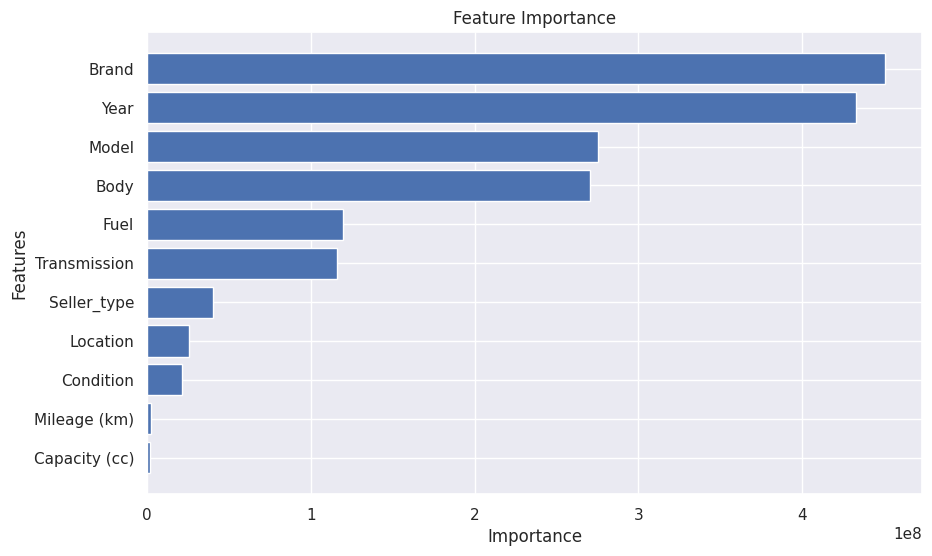

In [ ]:
#get features importance for model four
#calculate permutation importance
perm_importance = permutation_importance(model4,
                                         X_val,
                                         y_val,
                                         n_repeats=10,
                                         scoring="neg_mean_squared_error",
                                         random_state=36)

#get features importance
feature_importance4 = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})

#sort features in order of importance
feature_importance4 = feature_importance4.sort_values(by="Importance", ascending=False)

#plot features importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance4)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Models Evaluation

### Evaluation - Baseline Model (LR)

In [ ]:
#get predictions on X_test
y_pred_baseline = baseline_model.predict(X_test)

#round predictions to two decimal places
y_pred_baseline = np.round(y_pred_baseline, 2)
y_pred_baseline

array([-2454.55, 30413.64, 40038.95, ..., 29073.13, 25718.38, 15156.06])

In [ ]:
#get mse on y_test
mse_baseline = mean_squared_error(y_test, y_pred_baseline)

#calculate rmse
rmse_baseline = np.sqrt(mse_baseline)

#get r2 score
r2_baseline = r2_score(y_test, y_pred_baseline)

#display scores
print(f"Baseline Model - Root Mean Squared Error: {rmse_baseline:.2f}")
print(f"Baseline Model - R-squared Score: {r2_baseline:.2f}")

Baseline Model - Root Mean Squared Error: 21007.16
Baseline Model - R-squared Score: 0.19


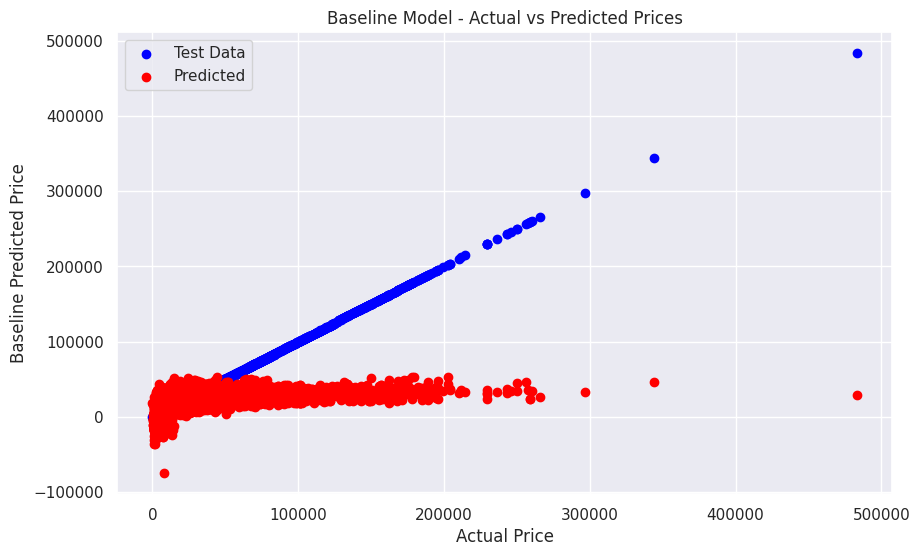

In [ ]:
#plot predictions
#set fig size
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color="blue", label="Test Data")
plt.scatter(y_test, y_pred_baseline, color="red", label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Baseline Predicted Price")
plt.title("Baseline Model - Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((79018, 11), (79018,))

In [ ]:
#create a dataframe to store actual price and predicted prices
#create column for actual price
price_comparison = pd.DataFrame({"Actual Price": y_test})

#add column for baseline predicted prices
price_comparison["Baseline Price"] = y_pred_baseline

### Evaluation - Model One (DT)

In [ ]:
#get predictions on X_test
y_pred1 = model1.predict(X_test)

#round predictions to two decimal places
y_pred1 = np.round(y_pred1, 2)
y_pred1

array([ 1309.5 , 15231.2 , 15592.5 , ..., 21915.  , 15769.69, 12800.74])

In [ ]:
#get mse
mse1 = mean_squared_error(y_test, y_pred1)

#calculate rmse
rmse1 = np.sqrt(mse1)

#get r2 score
r2_1 = r2_score(y_test, y_pred1)

#display scores
print(f"Model One - Root Mean Squared Error: {rmse1:.2f}")
print(f"Model One - R-squared Score: {r2_1:.2f}")

Model One - Root Mean Squared Error: 7945.82
Model One - R-squared Score: 0.88


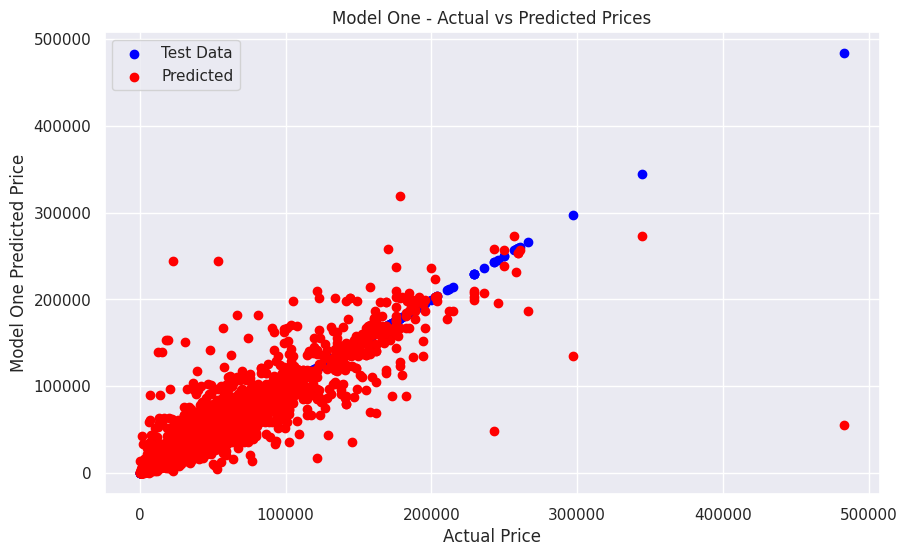

In [ ]:
#plot predictions
#set fig size
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color="blue", label="Test Data")
plt.scatter(y_test, y_pred1, color="red", label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Model One Predicted Price")
plt.title("Model One - Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
#add column for model one predicted prices
price_comparison["Model1 Price"] = y_pred1

### Evaluation Model Two (KN)

In [ ]:
#get predictions on X_test
y_pred2 = model2.predict(X_test)

#round predictions to two decimal places
y_pred2 = np.round(y_pred2, 2)
y_pred2

array([ 1671.49, 16100.27, 46453.54, ..., 25632.68, 12008.92,  9454.6 ])

In [ ]:
#get mse
mse2 = mean_squared_error(y_test, y_pred2)

#calculate rmse
rmse2 = np.sqrt(mse2)

#get r2 score
r2_2 = r2_score(y_test, y_pred2)

#display scores
print(f"Model Two - Root Mean Squared Error: {rmse2:.2f}")
print(f"Model Two - R-squared Score: {r2_2:.2f}")

Model Two - Root Mean Squared Error: 9639.16
Model Two - R-squared Score: 0.83


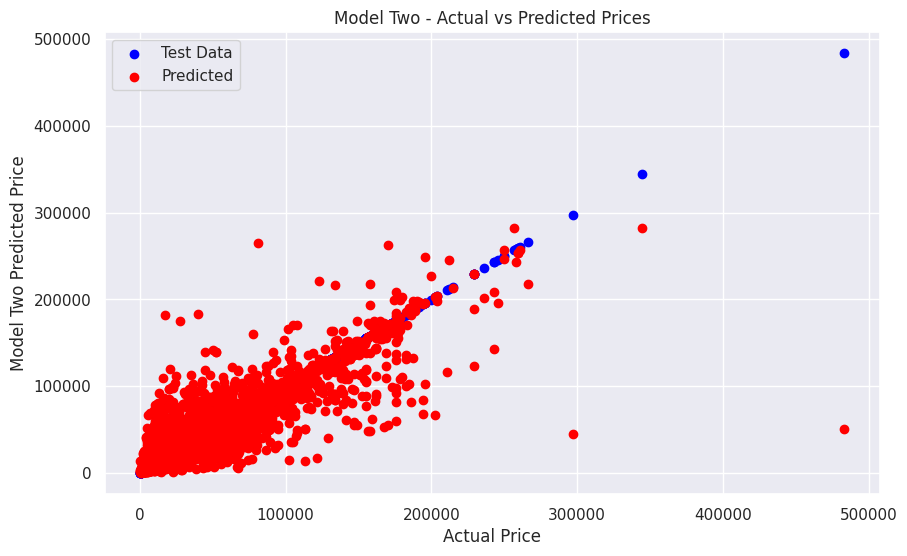

In [ ]:
#plot predictions
#set fig size
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color="blue", label="Test Data")
plt.scatter(y_test, y_pred2, color="red", label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Model Two Predicted Price")
plt.title("Model Two - Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
#add column for model two predicted prices
price_comparison["Model2 Price"] = y_pred2

### Evaluation - Model Three (RF)

In [ ]:
#get predictions on X_test
y_pred3 = model3.predict(X_test)

#round predictions to two decimal places
y_pred3 = np.round(y_pred3, 2)
y_pred3

array([ 2233.09, 14416.25, 15951.98, ..., 25377.51, 16082.6 , 12988.85])

In [ ]:
#get mse
mse3 = mean_squared_error(y_test, y_pred3)

#calculate rmse
rmse3 = np.sqrt(mse3)

#get r2 score
r2_3 = r2_score(y_test, y_pred3)

#display scores
print(f"Model Three - Root Mean Squared Error: {rmse3:.2f}")
print(f"Model Three - R-squared Score: {r2_3:.2f}")

Model Three - Root Mean Squared Error: 6448.58
Model Three - R-squared Score: 0.92


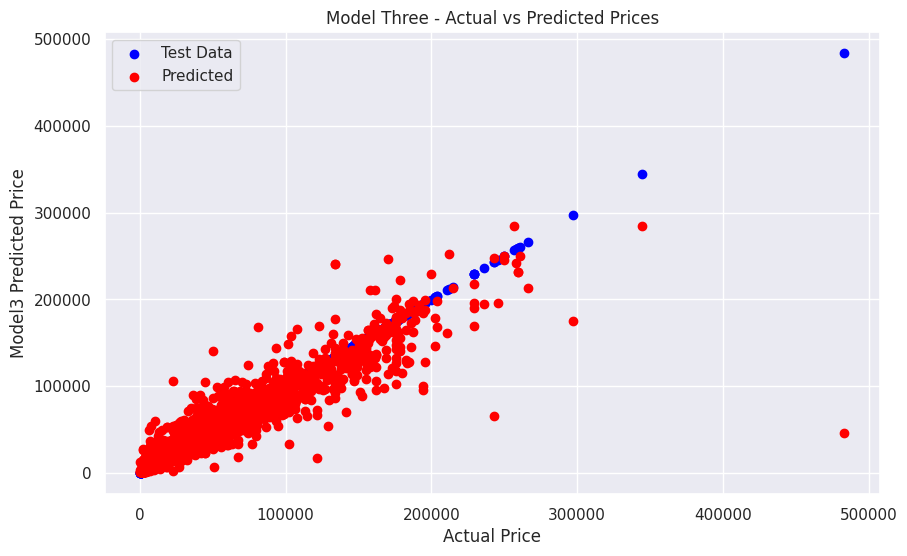

In [ ]:
#plot predictions
#set fig size
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color="blue", label="Test Data")
plt.scatter(y_test, y_pred3, color="red", label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Model3 Predicted Price")
plt.title("Model Three - Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
#add column for model three predicted prices
price_comparison["Model3 Price"] = y_pred3

### Evaluation - Model Four (NN)

In [ ]:
#get predictions on X_test
y_pred4 = model4.predict(X_test)

#round predictions to two decimal places
y_pred4 = np.round(y_pred4, 2)
y_pred4

686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[ 1232.97],
       [21127.42],
       [17311.11],
       ...,
       [17852.93],
       [23717.8 ],
       [12488.29]], dtype=float32)

In [ ]:
#get mse
mse4 = mean_squared_error(y_test, y_pred4)

#calculate rmse
rmse4 = np.sqrt(mse4)

#get r2 score
r2_4 = r2_score(y_test, y_pred4)

#display scores
print(f"Model Four - Root Mean Squared Error: {rmse4:.2f}")
print(f"Model Four - R-squared Score: {r2_4:.2f}")

Model Four - Root Mean Squared Error: 10042.27
Model Four - R-squared Score: 0.81


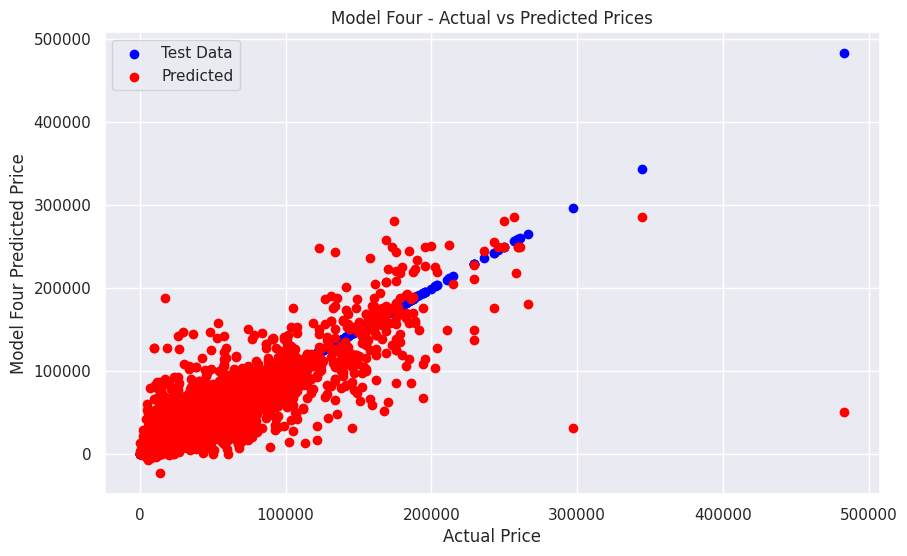

In [ ]:
#plot predictions
#set fig size
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color="blue", label="Test Data")
plt.scatter(y_test, y_pred4, color="red", label="Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Model Four Predicted Price")
plt.title("Model Four - Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
#add column for model four predicted prices
price_comparison["Model4 Price"] = y_pred4

## Models Comparison

In [ ]:
#display first 10 samples of actual vs predicted prices
price_comparison.head(10)

,Actual Price,Baseline Price,Model1 Price,Model2 Price,Model3 Price,Model4 Price
119734,1830.10,-2454.55,1309.50,1671.49,2233.09,1232.969971
29497,6480.00,30413.64,15231.20,16100.27,14416.25,21127.419922
37091,14175.00,40038.95,15592.50,46453.54,15951.98,17311.109375
78047,23582.52,24971.82,24516.36,29163.28,25732.63,34365.980469
18518,19575.00,33217.29,22369.50,20860.68,22501.69,19335.419922
109813,3529.24,27320.84,3496.67,10588.49,3870.02,4394.540039
93926,3414.76,15415.57,3414.76,4327.33,3417.99,4208.649902
34081,21600.00,22076.34,23827.50,24168.62,22120.68,21192.300781
4539,13095.00,7392.23,16579.16,14978.46,15101.28,12130.610352
112256,12680.42,23182.12,12634.81,17818.03,12935.37,14347.250000


In [ ]:
#compare actual price vs baseline
price_comparison[["Actual Price", "Baseline Price"]].head(10)

,Actual Price,Baseline Price
119734,1830.10,-2454.55
29497,6480.00,30413.64
37091,14175.00,40038.95
78047,23582.52,24971.82
18518,19575.00,33217.29
109813,3529.24,27320.84
93926,3414.76,15415.57
34081,21600.00,22076.34
4539,13095.00,7392.23
112256,12680.42,23182.12


In [ ]:
#compare model two predictions with actual price
price_comparison[["Actual Price", "Model2 Price"]].head(10)

,Actual Price,Model2 Price
119734,1830.10,1671.49
29497,6480.00,16100.27
37091,14175.00,46453.54
78047,23582.52,29163.28
18518,19575.00,20860.68
109813,3529.24,10588.49
93926,3414.76,4327.33
34081,21600.00,24168.62
4539,13095.00,14978.46
112256,12680.42,17818.03


In [ ]:
#compare model3 predictions with actual price
price_comparison[["Actual Price", "Model3 Price"]].head(10)

,Actual Price,Model3 Price
119734,1830.10,2233.09
29497,6480.00,14416.25
37091,14175.00,15951.98
78047,23582.52,25732.63
18518,19575.00,22501.69
109813,3529.24,3870.02
93926,3414.76,3417.99
34081,21600.00,22120.68
4539,13095.00,15101.28
112256,12680.42,12935.37


In [ ]:
#compare model 4 predictions with actual price
price_comparison[["Actual Price", "Model4 Price"]].head(10)

,Actual Price,Model4 Price
119734,1830.10,1232.969971
29497,6480.00,21127.419922
37091,14175.00,17311.109375
78047,23582.52,34365.980469
18518,19575.00,19335.419922
109813,3529.24,4394.540039
93926,3414.76,4208.649902
34081,21600.00,21192.300781
4539,13095.00,12130.610352
112256,12680.42,14347.250000


In [ ]:
#store rmse and r2 scores in a list for comparison
metrics_data = [
    {"Model": "Baseline (LR)",
     "RMSE": rmse_baseline,
     "R2": r2_baseline},
    {"Model": "Model One (DT)",
     "RMSE": rmse1,
     "R2": r2_1},
    {"Model": "Model Two (KN)",
     "RMSE": rmse2,
     "R2": r2_2},
    {"Model": "Model Three (RF)",
     "RMSE": rmse3,
     "R2": r2_3},
    {"Model": "Model Four (NN)",
     "RMSE": rmse4,
     "R2": r2_4}
]

#create a dict of metrics
metrics = pd.DataFrame(metrics_data)

In [ ]:
#plot rmse
fig = px.bar(
    metrics,
    x="Model",
    y="RMSE",
    title="RMSE Comparison Across Models",
    text="RMSE",
    color="RMSE",
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Models",
    yaxis_title="Root Mean Square Error (RMSE)",
    template="plotly_white",
    title_font=dict(size=20),
    showlegend=False
)

fig.show()

In [ ]:
#plot r score
fig = px.bar(
    metrics,
    x="Model",
    y="R2",
    title="R² Comparison Across Models",
    text="R2",
    color="R2",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Models",
    yaxis_title="R² Score",
    template="plotly_white",
    title_font=dict(size=20),
    showlegend=False
)

fig.show()